In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
import requests

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

-------------

In [5]:
# Loading data

# Link to the data:

# (https://www.kaggle.com/datasets/hemanthsai7/loandefault?select=train.csv)

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [8]:
data.shape

(67463, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

-----------------

In [10]:
# Scraping information from the web to obtain more information about Credit Scores and the relation to Grades

In [11]:
url = 'https://www.opploans.com/oppu/building-credit/grading-your-credit-score/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

grade_selectors = [
    {'grade': 'A', 'score_selector': '#flt-sdb > div > p:nth-child(10) > strong:nth-child(1)'},
    {'grade': 'B', 'score_selector': '#flt-sdb > div > p:nth-child(14) > strong:nth-child(1)'},
    {'grade': 'C', 'score_selector': '#flt-sdb > div > p:nth-child(19) > strong:nth-child(1)'},
    {'grade': 'D', 'score_selector': '#flt-sdb > div > p:nth-child(27) > strong:nth-child(1)'},
    {'grade': 'E-F', 'score_selector': '#flt-sdb > div > p:nth-child(32) > strong:nth-child(1)'}
]

info = []

for grade_info in grade_selectors:
    grade = grade_info['grade']
    score_selector = grade_info['score_selector']

    score_element = soup.select_one(score_selector)

    if score_element:
        score_text = score_element.text.strip()
        info.append({'Grade': f"Grade {grade}", 'Score': f"{score_text}"})

df = pd.DataFrame(info)
df

,Grade,Score
0,Grade A,720 or above
1,Grade B,680 and 719
2,Grade C,630 and 679
3,Grade D,550 and 629
4,Grade E-F,below 550


In [12]:
# The representation of the credit score helps us to better understand the values of Grade.

---------------------

In [13]:
# Renaming columns so they follow the PE8 (snake case) - (lower_case_with_underscores)

cols=[]
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace('-', '').replace(' ', '_'))
data.columns=cols

data.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,employment_duration,home_ownership,verification_status,payment_plan,loan_title,debit_to_income,delinquency__two_years,inquires__six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [14]:
cols=[]
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace('__', '_'))
data.columns=cols

data.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,employment_duration,home_ownership,verification_status,payment_plan,loan_title,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


----------------

In [15]:
# Checking for NaN

data.isna().sum().sum()

0

In [16]:
# Checking for duplicates

data.duplicated().sum()

0

-----------------

In [17]:
# Splitting into numerical

numerical = data.select_dtypes(np.number)

In [18]:
display(numerical.head())

numerical.shape

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


(67463, 26)

In [19]:
numerical.dtypes

id                                int64
loan_amount                       int64
funded_amount                     int64
funded_amount_investor          float64
term                              int64
interest_rate                   float64
home_ownership                  float64
debit_to_income                 float64
delinquency_two_years             int64
inquires_six_months               int64
open_account                      int64
public_record                     int64
revolving_balance                 int64
revolving_utilities             float64
total_accounts                    int64
total_received_interest         float64
total_received_late_fee         float64
recoveries                      float64
collection_recovery_fee         float64
collection_12_months_medical      int64
last_week_pay                     int64
accounts_delinquent               int64
total_collection_amount           int64
total_current_balance             int64
total_revolving_credit_limit      int64


-----------------

In [20]:
# Checking numerical columns and insights

In [21]:
# Loan Status: target (0 = Non defaulter // 1 = Defaulter)

loan_status_counts = numerical['loan_status'].value_counts()

loan_status_counts

loan_status
0    61222
1     6241
Name: count, dtype: int64

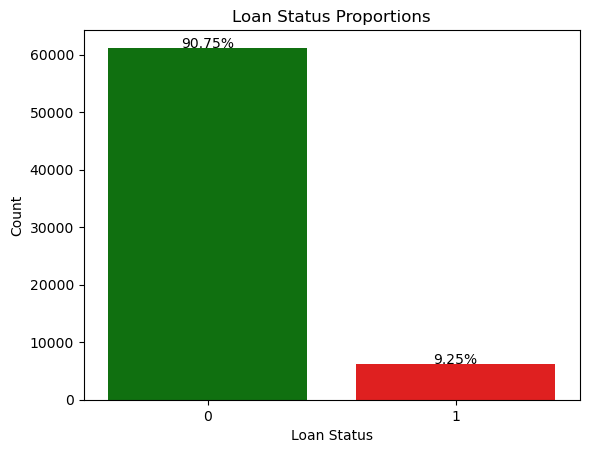

In [22]:
# Plotting the target (Loan Status) with proportions from the total

sns.countplot(data=numerical, x='loan_status', palette={0: 'green', 1: 'red'})

total_loans = numerical['loan_status'].count()
loan_status_counts = numerical['loan_status'].value_counts()
proportions = loan_status_counts / total_loans

for i, proportion in enumerate(proportions):
    plt.text(i, loan_status_counts[i] + 50, f"{proportion:.2%}", ha='center')

plt.title('Loan Status Proportions')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [23]:
# Comments to the target (Loan Status):

# Initially we can see an imbalance suggesting a classification problem showing significant disparity between 
# the two classes. In this case, there is a noticeable imbalance between class 0 (Non Defaulter) and 
# class 1 (Defaulter), where 0 comprises approximately 90.75% of the data, and 1 only 9.25%.

# To ensure that the model doesn't favor the majority class too heavily. We will have to apply techniques like 
# resampling methods (Smote/oversampling/undersampling), using different evaluation metrics 
# (precision, recall, F1-score) to mitigate the impacte of the imbalance.

In [24]:
# ID: unique classifier

numerical['id'].value_counts()

id
65087372    1
67169611    1
51765039    1
31003776    1
7030387     1
           ..
4898110     1
35796018    1
23689675    1
1534700     1
65443173    1
Name: count, Length: 67463, dtype: int64

In [25]:
# Dropping id

numerical = numerical.drop ('id', axis=1)

In [26]:
# Loan Amount:

numerical['loan_amount'].value_counts()

loan_amount
15932    13
14424    12
15800    11
15639    11
15118    11
         ..
2588      1
33968     1
5420      1
12285     1
8323      1
Name: count, Length: 27525, dtype: int64

In [27]:
numerical['loan_amount'].describe()

count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [28]:
# Funded Amount:

numerical['funded_amount'].value_counts()

funded_amount
10835    16
11034    15
11451    14
10728    14
7691     14
         ..
23126     1
14571     1
33015     1
33109     1
29875     1
Name: count, Length: 24548, dtype: int64

In [29]:
numerical['funded_amount'].describe()

count    67463.000000
mean     15770.599114
std       8150.992662
min       1014.000000
25%       9266.500000
50%      13042.000000
75%      21793.000000
max      34999.000000
Name: funded_amount, dtype: float64

In [30]:
# Funded Amount Investor:

numerical['funded_amount_investor'].value_counts()

funded_amount_investor
12099.718300    2
7890.447955     2
13910.430240    2
8879.914835     2
12367.568060    2
               ..
7649.614605     1
23429.196790    1
9799.247690     1
12996.386950    1
14207.448600    1
Name: count, Length: 67441, dtype: int64

In [31]:
numerical['funded_amount_investor'].describe()

count    67463.000000
mean     14621.799323
std       6785.345170
min       1114.590204
25%       9831.684984
50%      12793.682170
75%      17807.594120
max      34999.746430
Name: funded_amount_investor, dtype: float64

In [32]:
# Term:

numerical['term'].value_counts()

term
59    43780
58    22226
36     1457
Name: count, dtype: int64

In [33]:
# Mapping numerical values to categorical labels beacuse we have only 3 values

term_mapping = {
    36: '0',
    58: '0.5',  
    59: '1',  }

numerical['term_categories'] = numerical['term'].map(term_mapping)

In [34]:
numerical['term_categories'].value_counts(dropna=False)

term_categories
1      43780
0.5    22226
0       1457
Name: count, dtype: int64

In [35]:
# Dropping the original and keeping the generated one

numerical = numerical.drop('term', axis = 1)

In [36]:
# Interest Rate:

numerical['interest_rate'].value_counts()

interest_rate
6.191126     2
8.637499     2
9.996611     2
9.530343     2
11.978370    2
            ..
12.052329    1
16.739702    1
7.406152     1
19.632720    1
16.034631    1
Name: count, Length: 67448, dtype: int64

In [37]:
numerical['interest_rate'].describe()

count    67463.000000
mean        11.846258
std          3.718629
min          5.320006
25%          9.297147
50%         11.377696
75%         14.193533
max         27.182348
Name: interest_rate, dtype: float64

In [38]:
# Home Ownership:

numerical['home_ownership'].value_counts()

home_ownership
39753.81982     2
71159.71240     2
61831.12988     2
27139.67231     2
35858.04083     2
               ..
105479.67850    1
36067.24822     1
59708.80456     1
118436.23590    1
105123.15580    1
Name: count, Length: 67454, dtype: int64

In [39]:
numerical['home_ownership'].describe()

count     67463.000000
mean      80541.502522
std       45029.120366
min       14573.537170
25%       51689.843335
50%       69335.832680
75%       94623.322785
max      406561.536400
Name: home_ownership, dtype: float64

In [40]:
# Debt to Income:

numerical['debit_to_income'].value_counts()

debit_to_income
24.977361    2
22.368527    2
18.792519    2
35.467099    2
24.505453    2
            ..
27.764362    1
35.819821    1
30.352185    1
27.560373    1
16.052112    1
Name: count, Length: 67454, dtype: int64

In [41]:
numerical['debit_to_income'].describe()

count    67463.000000
mean        23.299241
std          8.451824
min          0.675299
25%         16.756416
50%         22.656658
75%         30.048400
max         39.629862
Name: debit_to_income, dtype: float64

In [42]:
# Delinquency two Years:

numerical['delinquency_two_years'].value_counts()

delinquency_two_years
0    52054
1    11736
2     2651
3      445
7      252
6      191
5       74
8       44
4       16
Name: count, dtype: int64

In [43]:
numerical['delinquency_two_years'].describe()

count    67463.000000
mean         0.327127
std          0.800888
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: delinquency_two_years, dtype: float64

In [44]:
# Inquiries six Month:

numerical['inquires_six_months'].value_counts()

inquires_six_months
0    60486
1     4558
2     2042
3      320
4       54
5        3
Name: count, dtype: int64

In [45]:
numerical['inquires_six_months'].describe()

count    67463.000000
mean         0.145754
std          0.473291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: inquires_six_months, dtype: float64

In [46]:
# Open Account:

numerical['open_account'].value_counts()

open_account
12    8480
13    7907
11    7323
14    6056
10    5804
9     4658
15    3350
8     3141
16    2089
7     1895
17    1499
18    1288
19    1259
20    1146
6     1016
21    1014
24     815
22     803
25     794
23     793
26     669
28     668
27     657
30     631
29     590
31     564
32     513
33     499
5      472
34     346
35     231
4      197
36     152
37      94
3       44
2        6
Name: count, dtype: int64

In [47]:
numerical['open_account'].describe()

count    67463.000000
mean        14.266561
std          6.225060
min          2.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         37.000000
Name: open_account, dtype: float64

In [48]:
# Public Record:

numerical['public_record'].value_counts()

public_record
0    62871
1     4133
2      200
4      184
3       75
Name: count, dtype: int64

In [49]:
numerical['public_record'].describe()

count    67463.000000
mean         0.081437
std          0.346606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: public_record, dtype: float64

In [50]:
# Revolving Balance:

numerical['revolving_balance'].value_counts()

revolving_balance
1394     18
3997     16
311      16
1202     15
869      15
         ..
15537     1
13396     1
12215     1
37050     1
27384     1
Name: count, Length: 20582, dtype: int64

In [51]:
numerical['revolving_balance'].describe()

count     67463.000000
mean       7699.342425
std        7836.148190
min           0.000000
25%        2557.000000
50%        5516.000000
75%       10184.500000
max      116933.000000
Name: revolving_balance, dtype: float64

In [52]:
# Revolving Utilities:

numerical['revolving_utilities'].value_counts()

revolving_utilities
39.611859    2
40.558371    2
91.317484    2
9.409247     2
66.659546    2
            ..
18.481235    1
69.244534    1
48.458952    1
41.427485    1
81.692328    1
Name: count, Length: 67458, dtype: int64

In [53]:
numerical['revolving_utilities'].describe()

count    67463.000000
mean        52.889443
std         22.539450
min          0.005172
25%         38.658825
50%         54.082334
75%         69.177117
max        100.880050
Name: revolving_utilities, dtype: float64

In [54]:
# Total Accounts:

numerical['total_accounts'].value_counts()

total_accounts
18    3770
17    3727
19    3700
20    3596
16    3404
      ... 
67       2
70       1
66       1
69       1
62       1
Name: count, Length: 69, dtype: int64

In [55]:
numerical['total_accounts'].describe()

count    67463.000000
mean        18.627929
std          8.319246
min          4.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         72.000000
Name: total_accounts, dtype: float64

In [56]:
# Total Received Interest:

numerical['total_received_interest'].value_counts()

total_received_interest
437.925021     2
2476.701276    2
941.274347     2
9061.050032    2
607.260205     2
              ..
2651.493708    1
6516.687729    1
1273.315853    1
183.071271     1
1324.255922    1
Name: count, Length: 67451, dtype: int64

In [57]:
numerical['total_received_interest'].describe()

count    67463.000000
mean      2068.992542
std       2221.918745
min          4.736746
25%        570.903814
50%       1330.842771
75%       2656.956837
max      14301.368310
Name: total_received_interest, dtype: float64

In [58]:
# Total Received Late Fee:

numerical['total_received_late_fee'].value_counts()

total_received_late_fee
0.037408     2
0.088161     2
0.058945     2
0.080775     2
0.030373     2
            ..
29.618905    1
0.075254     1
0.053790     1
0.070169     1
0.000671     1
Name: count, Length: 67380, dtype: int64

In [59]:
numerical['total_received_late_fee'].describe()

count    67463.000000
mean         1.143969
std          5.244365
min          0.000003
25%          0.021114
50%          0.043398
75%          0.071884
max         42.618882
Name: total_received_late_fee, dtype: float64

In [60]:
# Recoveries:

numerical['recoveries'].value_counts()

recoveries
1.816960    2
4.764209    2
5.151216    2
6.983540    2
3.225565    2
           ..
6.811328    1
1.444342    1
6.383254    1
0.639838    1
1.856480    1
Name: count, Length: 67387, dtype: int64

In [61]:
numerical['recoveries'].describe()

count    67463.000000
mean        59.691578
std        357.026346
min          0.000036
25%          1.629818
50%          3.344524
75%          5.453727
max       4354.467419
Name: recoveries, dtype: float64

In [62]:
# Collection Recovery Fee:

numerical['collection_recovery_fee'].value_counts()

collection_recovery_fee
1.125373    3
0.533738    2
0.792153    2
1.139062    2
0.345642    2
           ..
0.573105    1
0.152826    1
1.468114    1
0.750572    1
0.366386    1
Name: count, Length: 67313, dtype: int64

In [63]:
numerical['collection_recovery_fee'].describe()

count    67463.000000
mean         1.125141
std          3.489885
min          0.000036
25%          0.476259
50%          0.780141
75%          1.070566
max        166.833000
Name: collection_recovery_fee, dtype: float64

In [64]:
# Collection 12 Months medical:

numerical['collection_12_months_medical'].value_counts()

collection_12_months_medical
0    66026
1     1437
Name: count, dtype: int64

In [65]:
# Already binary. Nothing to do here.

In [66]:
# Las Week Pay:

numerical['last_week_pay'].value_counts()

last_week_pay
14     743
13     729
12     714
11     713
10     710
      ... 
2      203
160    174
161    163
1      141
0      131
Name: count, Length: 162, dtype: int64

In [67]:
numerical['last_week_pay'].describe()

count    67463.000000
mean        71.163260
std         43.315845
min          0.000000
25%         35.000000
50%         68.000000
75%        105.000000
max        161.000000
Name: last_week_pay, dtype: float64

In [68]:
# Accounts Delinquent:

numerical['accounts_delinquent'].value_counts()

accounts_delinquent
0    67463
Name: count, dtype: int64

In [69]:
# Only one value. Let's drop it.

numerical = numerical.drop('accounts_delinquent', axis=1)

In [70]:
# Total Collection Amount:

numerical['total_collection_amount'].value_counts()

total_collection_amount
39       1665
37       1656
36       1637
41       1623
40       1622
         ... 
2051        1
1053        1
2600        1
14344       1
5302        1
Name: count, Length: 2193, dtype: int64

In [71]:
numerical['total_collection_amount'].describe()

count    67463.000000
mean       146.467990
std        744.382233
min          1.000000
25%         24.000000
50%         36.000000
75%         46.000000
max      16421.000000
Name: total_collection_amount, dtype: float64

In [72]:
# Total Current Balance:

numerical['total_current_balance'].value_counts()

total_current_balance
51737     5
36268     5
69865     4
51723     4
44225     4
         ..
299766    1
13592     1
98018     1
85712     1
196960    1
Name: count, Length: 60901, dtype: int64

In [73]:
numerical['total_current_balance'].describe()

count    6.746300e+04
mean     1.595739e+05
std      1.390332e+05
min      6.170000e+02
25%      5.037900e+04
50%      1.183690e+05
75%      2.283750e+05
max      1.177412e+06
Name: total_current_balance, dtype: float64

In [74]:
# Total Revolving Credit Limit:

numerical['total_revolving_credit_limit'].value_counts()

total_revolving_credit_limit
5310     10
7026     10
6083      9
4754      9
5413      9
         ..
49858     1
19927     1
13384     1
1269      1
66060     1
Name: count, Length: 37708, dtype: int64

In [75]:
numerical['total_revolving_credit_limit'].describe()

count     67463.000000
mean      23123.005544
std       20916.699999
min        1000.000000
25%        8155.500000
50%       16733.000000
75%       32146.500000
max      201169.000000
Name: total_revolving_credit_limit, dtype: float64

--------------------

In [76]:
# Comments to the numerical features:

# I have tried to bin each numerical feature (percentile or 0/1) to try to reduce dimension by reducing the
# number of uniques values in a feature and try to mitigate the impact of outliers. I thought it could help 
# to enhance the robustness of the model aginst overfitting.

# After running the model, I have not seen better results, so I decided to mantain them and only bin a few of
# them which I consider it could simplify the feature.

# In the process we only see the final selection.

-----------

In [77]:
# Splitting into categorical

categorical = data.select_dtypes(object)

In [78]:
display(categorical.head())

categorical.shape

,batch_enrolled,grade,sub_grade,employment_duration,verification_status,payment_plan,loan_title,initial_list_status,application_type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL


(67463, 9)

In [79]:
categorical.dtypes

batch_enrolled         object
grade                  object
sub_grade              object
employment_duration    object
verification_status    object
payment_plan           object
loan_title             object
initial_list_status    object
application_type       object
dtype: object

In [80]:
# Checking categorical columns and insights

In [81]:
# Batch Enrolled:

categorical['batch_enrolled'].value_counts()

batch_enrolled
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: count, dtype: int64

In [82]:
len(categorical['batch_enrolled'].value_counts())

41

In [83]:
# Checking the proportion of Defaulters per group to understand any patterns or insights about the behaviour of
# the loans/groups and the Defaulters:

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='batch_enrolled', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'batch_default_proportion': proportions_sorted})

proportions

,batch_default_proportion
batch_enrolled,
BAT3873588,0.054478
BAT1586599,0.052876
BAT1104812,0.047909
BAT1780517,0.038295
BAT2252229,0.038135
BAT4694572,0.034610
BAT2803411,0.034289
BAT2575549,0.034129
BAT2078974,0.033488


In [84]:
proportions.describe()

,batch_default_proportion
count,41.000000
mean,0.024390
std,0.011264
min,0.005929
25%,0.014901
50%,0.022593
75%,0.030764
max,0.054478


In [85]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='batch_enrolled', how='left')

batch_labels = ['0', '0.5', '1', '2']

batch_bins = [0, 0.015, 0.023, 0.031, 0.055]

categorical['batch_enrolled_ordinal'] = pd.cut(categorical['batch_default_proportion'], bins=batch_bins, labels=batch_labels)

In [86]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['batch_enrolled', 'batch_default_proportion'], axis=1)

In [87]:
# Grade:

categorical['grade'].value_counts()

grade
C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: count, dtype: int64

In [88]:
len(categorical['grade'].value_counts())

7

In [89]:
# Checking the proportion of Defaulters per Grade to understand any patterns or insights and the relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='grade', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'grade_default_proportion': proportions_sorted})

proportions

,grade_default_proportion
grade,
C,0.287133
B,0.261977
A,0.176254
D,0.127544
E,0.099023
F,0.037334
G,0.010735


In [90]:
proportions.describe()

,grade_default_proportion
count,7.000000
mean,0.142857
std,0.105568
min,0.010735
25%,0.068178
50%,0.127544
75%,0.219116
max,0.287133


In [91]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='grade', how='left')

labels = ['0', '0.5', '1', '2']

bins = [0, 0.069, 0.13, 0.22, 0.29]

categorical['grade_ordinal'] = pd.cut(categorical['grade_default_proportion'], bins=bins, labels=labels)

In [92]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['grade', 'grade_default_proportion'], axis=1)

In [93]:
# Sub Grade:

categorical['sub_grade'].value_counts()

sub_grade
B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: count, dtype: int64

In [94]:
len(categorical['sub_grade'].value_counts())

35

In [95]:
# Let's extract the first character and keep only the number

data['sub_grade'] = data['sub_grade'].str.extract('(\d+)')

categorical['sub_grade'] = categorical['sub_grade'].str.extract('(\d+)')

In [96]:
data['sub_grade'].value_counts()

sub_grade
1    14268
4    13735
2    13679
5    13007
3    12774
Name: count, dtype: int64

In [97]:
categorical['sub_grade'].value_counts()

sub_grade
1    14268
4    13735
2    13679
5    13007
3    12774
Name: count, dtype: int64

In [98]:
# Checking the proportion of Defaulters per Sub Grade to understand any patterns or insights and the relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='sub_grade', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'sub_grade_default_proportion': proportions_sorted})

proportions

,sub_grade_default_proportion
sub_grade,
1,0.207178
4,0.204935
2,0.204134
5,0.198846
3,0.184906


In [99]:
proportions.describe()

,sub_grade_default_proportion
count,5.000000
mean,0.200000
std,0.008974
min,0.184906
25%,0.198846
50%,0.204134
75%,0.204935
max,0.207178


In [100]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='sub_grade', how='left')

batch_labels = ['0', '0.5', '1', '2']

batch_bins = [0, 0.185, 0.2042, 0.205, 0.2072]

categorical['sub_grade_ordinal'] = pd.cut(categorical['sub_grade_default_proportion'], bins=batch_bins, labels=batch_labels)

In [101]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['sub_grade', 'sub_grade_default_proportion'], axis=1)

In [102]:
# Employment Duration:

categorical['employment_duration'].value_counts()

employment_duration
MORTGAGE    36351
RENT        24150
OWN          6962
Name: count, dtype: int64

In [103]:
# Checking the proportion of Defaulters per Employment Duration to understand any patterns or insights and the relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='employment_duration', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'employment_duration_default_proportion': proportions_sorted})

proportions

,employment_duration_default_proportion
employment_duration,
MORTGAGE,0.516424
RENT,0.370293
OWN,0.113283


In [104]:
proportions.describe()

,employment_duration_default_proportion
count,3.000000
mean,0.333333
std,0.204096
min,0.113283
25%,0.241788
50%,0.370293
75%,0.443358
max,0.516424


In [105]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='employment_duration', how='left')

batch_labels = ['0', '0.5', '1']

batch_bins = [0, 0.1722, 0.371, 0.5165]

categorical['employment_duration_ordinal'] = pd.cut(categorical['employment_duration_default_proportion'], bins=batch_bins, labels=batch_labels)

In [106]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['employment_duration', 'employment_duration_default_proportion'], axis=1)

In [107]:
# Verification Status:

categorical['verification_status'].value_counts()

verification_status
Source Verified    33036
Verified           18078
Not Verified       16349
Name: count, dtype: int64

In [108]:
# Checking the proportion of Defaulters per Verification Status to understand any patterns or insights and the relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='verification_status', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'verification_status_default_proportion': proportions_sorted})

proportions

,verification_status_default_proportion
verification_status,
Source Verified,0.494312
Verified,0.264381
Not Verified,0.241307


In [109]:
proportions.describe()

,verification_status_default_proportion
count,3.000000
mean,0.333333
std,0.139888
min,0.241307
25%,0.252844
50%,0.264381
75%,0.379346
max,0.494312


In [110]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='verification_status', how='left')

batch_labels = ['0', '0.5', '1']

batch_bins = [0, 0.242, 0.30, 0.495]

categorical['verification_status_ordinal'] = pd.cut(categorical['verification_status_default_proportion'], bins=batch_bins, labels=batch_labels)

In [111]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['verification_status', 'verification_status_default_proportion'], axis=1)

In [112]:
# Payment Plan:

categorical['payment_plan'].value_counts()

payment_plan
n    67463
Name: count, dtype: int64

In [113]:
# Only one value. Let's drop it.

categorical = categorical.drop(['payment_plan'], axis=1)

In [114]:
# Loan Title:

categorical['loan_title'].value_counts()

loan_title
Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: count, Length: 109, dtype: int64

In [115]:
len(categorical['loan_title'].value_counts())

109

In [116]:
categorical['loan_title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [117]:
# Checking the proportion of Defaulters per Loan Title to understand any patterns or insights and the relation


default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='loan_title', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'loan_title_default_proportion': proportions_sorted})

proportions

,loan_title_default_proportion
loan_title,
Credit card refinancing,0.462746
Debt consolidation,0.360359
Debt Consolidation,0.046467
Other,0.035411
Home improvement,0.033809
...,...
Credit Card Refinance Loan,0.000160
Card Consolidation,0.000160
CC Refinance,0.000160


In [118]:
# As we see, after filtering by default, we end up with 91 values instead of the 109. It means, that there are
# 18 unique values that have only 0 in Loan Status, no defualt. We are going to assume min as 0 (bin) and fill it.

In [119]:
proportions.describe()

,loan_title_default_proportion
count,91.000000
mean,0.010989
std,0.061254
min,0.000160
25%,0.000320
50%,0.000481
75%,0.000801
max,0.462746


In [120]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='loan_title', how='left')

batch_labels = ['0', '0.5', '1', '2']

batch_bins = [0, 0.00033, 0.00049, 0.00081, 0.47]

categorical['loan_title_ordinal'] = pd.cut(categorical['loan_title_default_proportion'], bins=batch_bins, labels=batch_labels)

In [121]:
categorical['loan_title_default_proportion'].isna().sum()

159

In [122]:
# Filling NaN but since we have a category already as a 0, we have to add it to the category

categorical['loan_title_ordinal'] = categorical['loan_title_ordinal'].cat.add_categories([0])
categorical['loan_title_ordinal'].fillna(0, inplace=True)

In [123]:
categorical['loan_title_ordinal'].isna().sum()

0

In [124]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['loan_title', 'loan_title_default_proportion'], axis=1)

In [125]:
# Initial List Status:

categorical['initial_list_status'].value_counts()

initial_list_status
w    36299
f    31164
Name: count, dtype: int64

In [126]:
# Checking the proportion of Defaulters per Initial List Status to understand any patterns or insights and the 
# relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='initial_list_status', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'initial_list_status_default_proportion': proportions_sorted})

proportions

,initial_list_status_default_proportion
initial_list_status,
w,0.517065
f,0.482935


In [127]:
proportions.describe()

,initial_list_status_default_proportion
count,2.000000
mean,0.500000
std,0.024133
min,0.482935
25%,0.491468
50%,0.500000
75%,0.508532
max,0.517065


In [128]:
# Let's ordinal encode the variable


categorical = pd.merge(categorical, proportions, on='initial_list_status', how='left')

batch_labels = ['0', '1']

batch_bins = [0, 0.50, 0.52]

categorical['initial_list_status_ordinal'] = pd.cut(categorical['initial_list_status_default_proportion'], bins=batch_bins, labels=batch_labels)

In [129]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters

categorical = categorical.drop(['initial_list_status', 'initial_list_status_default_proportion'], axis=1)

In [130]:
# Application Type:

categorical['application_type'].value_counts()

application_type
INDIVIDUAL    67340
JOINT           123
Name: count, dtype: int64

In [131]:
# Checking the proportion of Defaulters per Application Type to understand any patterns or insights and the relation

default_loans = data[data['loan_status'] == 1]

pivot_table = default_loans.pivot_table(index='application_type', aggfunc='size')

proportions = pivot_table.div(pivot_table.sum())

proportions_sorted = proportions.sort_values(ascending=False)

proportions = pd.DataFrame({'application_type_default_proportion': proportions_sorted})

proportions

,application_type_default_proportion
application_type,
INDIVIDUAL,0.998237
JOINT,0.001763


In [132]:
proportions.describe()

,application_type_default_proportion
count,2.000000
mean,0.500000
std,0.704614
min,0.001763
25%,0.250881
50%,0.500000
75%,0.749119
max,0.998237


In [133]:
# Let's ordinal encode the variable

categorical = pd.merge(categorical, proportions, on='application_type', how='left')

batch_labels = ['0', '1']

batch_bins = [0, 0.50, 1]

categorical['application_type_ordinal'] = pd.cut(categorical['application_type_default_proportion'], bins=batch_bins, labels=batch_labels)

In [134]:
# Dropping the orginial one and keeping the one encoded takind into account the relation with the Defaulters


categorical = categorical.drop(['application_type', 'application_type_default_proportion'], axis=1)

-------------------

In [135]:
# Comments to the categorical features:

# I have ordinal encode features based on the proportion of defaulters in each categorical values. I made it 
# for several reasons:

# Retaining Information: By using proportions of defaulters, it captures the relationship between categories and 
# the Loan Status, providing a ranking based on the likelihood of default.

# Maintaining Order: Ensuring that the encoded values reflect the likelihood of default.

# Improving Predictive Power: By encoding in that way categories with their respective default proportions, 
# the resulting numerical representation can enhance the models' ability to capture the association 
# between categorical features and Loan Status. This information might lead to more accurate predictions.

# Reducing Dimensionality: Potentially reducing the dimensionality of the dataset compared to one-hot encoding. 

-----------

In [136]:
# Now we can concatenate them. We have now all categoricals as number

data = pd.concat([numerical,categorical],axis = 1)

In [137]:
data

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0,1,0.5,2,1,1,0,2,1,1
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0,1,2,2,0,0.5,1,2,0,1
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0,1,1,0,1,1,1,2,1,1
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0,1,0.5,2,0,1,1,2,1,1
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0,1,1,2,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,4112,97.779389,19,1978.945960,0.023478,564.614852,0.865230,0,69,48,181775,34301,1,1,1,2,1,1,0.5,2,1,1
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,9737,15.690703,14,3100.803125,0.027095,2.015494,1.403368,0,14,37,22692,8714,0,1,2,2,0,0.5,1,2,1,1
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,2195,1.500090,9,2691.995532,0.028212,5.673092,1.607093,0,137,17,176857,42330,0,1,0,1,0,1,0.5,0,1,1
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,1172,68.481882,15,3659.334202,0.074508,1.157454,0.207608,0,73,61,361339,39075,0,1,1,0.5,0,0,0,2,0,1


-------------

In [138]:
# Let's create some ratios as new features

# Annual Income to Funded Amount Ratio
data['income_to_loan_ratio'] = data['home_ownership'] / data['funded_amount']

# Credit Utilization Ratio
data['credit_utilization_ratio'] = data['revolving_balance'] / data['total_revolving_credit_limit']

# Delinquency Ratio
data['delinquency_ratio'] = data['delinquency_two_years'] / data['total_accounts']

# Recovery Ratio
data['recovery_ratio'] = data['recoveries'] / data['funded_amount']

# Current Balance to Credit Limit Ratio
data['balance_to_credit_limit_ratio'] = data['total_current_balance'] / data['total_revolving_credit_limit']

In [139]:
# Comments:

# By creating new features calculating ratios, I want to try to capture interactions that provide insights 
# into the financial stability of each value and add context and relevance to the model.

------------------

In [140]:
# Checking after ordinal encode dtypes

In [141]:
data

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0,1,0.5,2,1,1,0,2,1,1,5.470487,3.663091,0.142857,0.000078,47.031425
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0,1,2,2,0,0.5,1,2,0,1,3.336174,0.038880,0.000000,0.000199,8.743596
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0,1,1,0,1,1,1,2,1,1,9.827805,0.070465,0.000000,0.000464,3.433416
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0,1,0.5,2,0,1,1,2,1,1,15.571840,0.229498,0.083333,0.000015,0.152606
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0,1,1,2,1,1,1,2,1,1,3.344535,0.068382,0.045455,0.097899,5.581691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,83961.15003,28.105127,1,0,13,0,4112,97.779389,19,1978.945960,0.023478,564.614852,0.865230,0,69,48,181775,34301,1,1,1,2,1,1,0.5,2,1,1,12.260682,0.119880,0.052632,0.082450,5.299408
67459,8323,11046,15637.46301,9.972104,65491.12817,17.694279,0,0,12,0,9737,15.690703,14,3100.803125,0.027095,2.015494,1.403368,0,14,37,22692,8714,0,1,2,2,0,0.5,1,2,1,1,5.928945,1.117397,0.000000,0.000182,2.604085
67460,15897,32921,12329.45775,19.650943,34813.96985,10.295774,0,0,7,1,2195,1.500090,9,2691.995532,0.028212,5.673092,1.607093,0,137,17,176857,42330,0,1,0,1,0,1,0.5,0,1,1,1.057500,0.051854,0.000000,0.000172,4.178053
67461,16567,4975,21353.68465,13.169095,96938.83564,7.614624,0,0,14,0,1172,68.481882,15,3659.334202,0.074508,1.157454,0.207608,0,73,61,361339,39075,0,1,1,0.5,0,0,0,2,0,1,19.485193,0.029994,0.000000,0.000233,9.247319


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   loan_amount                    67463 non-null  int64   
 1   funded_amount                  67463 non-null  int64   
 2   funded_amount_investor         67463 non-null  float64 
 3   interest_rate                  67463 non-null  float64 
 4   home_ownership                 67463 non-null  float64 
 5   debit_to_income                67463 non-null  float64 
 6   delinquency_two_years          67463 non-null  int64   
 7   inquires_six_months            67463 non-null  int64   
 8   open_account                   67463 non-null  int64   
 9   public_record                  67463 non-null  int64   
 10  revolving_balance              67463 non-null  int64   
 11  revolving_utilities            67463 non-null  float64 
 12  total_accounts                 6

In [143]:
# All to numeric

data = data.apply(pd.to_numeric, errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_amount                    67463 non-null  int64  
 1   funded_amount                  67463 non-null  int64  
 2   funded_amount_investor         67463 non-null  float64
 3   interest_rate                  67463 non-null  float64
 4   home_ownership                 67463 non-null  float64
 5   debit_to_income                67463 non-null  float64
 6   delinquency_two_years          67463 non-null  int64  
 7   inquires_six_months            67463 non-null  int64  
 8   open_account                   67463 non-null  int64  
 9   public_record                  67463 non-null  int64  
 10  revolving_balance              67463 non-null  int64  
 11  revolving_utilities            67463 non-null  float64
 12  total_accounts                 67463 non-null 

----------------

In [144]:
# Plotting the variables

histplot_col = ['loan_amount', 'funded_amount', 'funded_amount_investor', 'interest_rate', 'home_ownership', 'debit_to_income', 'revolving_balance','revolving_utilities', 'total_received_interest', 'total_received_late_fee', 'recoveries','collection_recovery_fee', 'total_collection_amount', 'total_current_balance','total_revolving_credit_limit']

boxplot_col = ['batch_enrolled_ordinal', 'grade_ordinal', 'sub_grade_ordinal', 'employment_duration_ordinal', 'verification_status_ordinal','loan_title_ordinal','initial_list_status_ordinal', 'application_type_ordinal']

In [145]:
# Plotting Numericals (histplot_col)

def displot_variables(df, columns):
    num_cols = 4
    num_rows = (len(df.columns) - 1) // num_cols + 1

    plt.figure(figsize=(18, 4 * num_rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
        plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

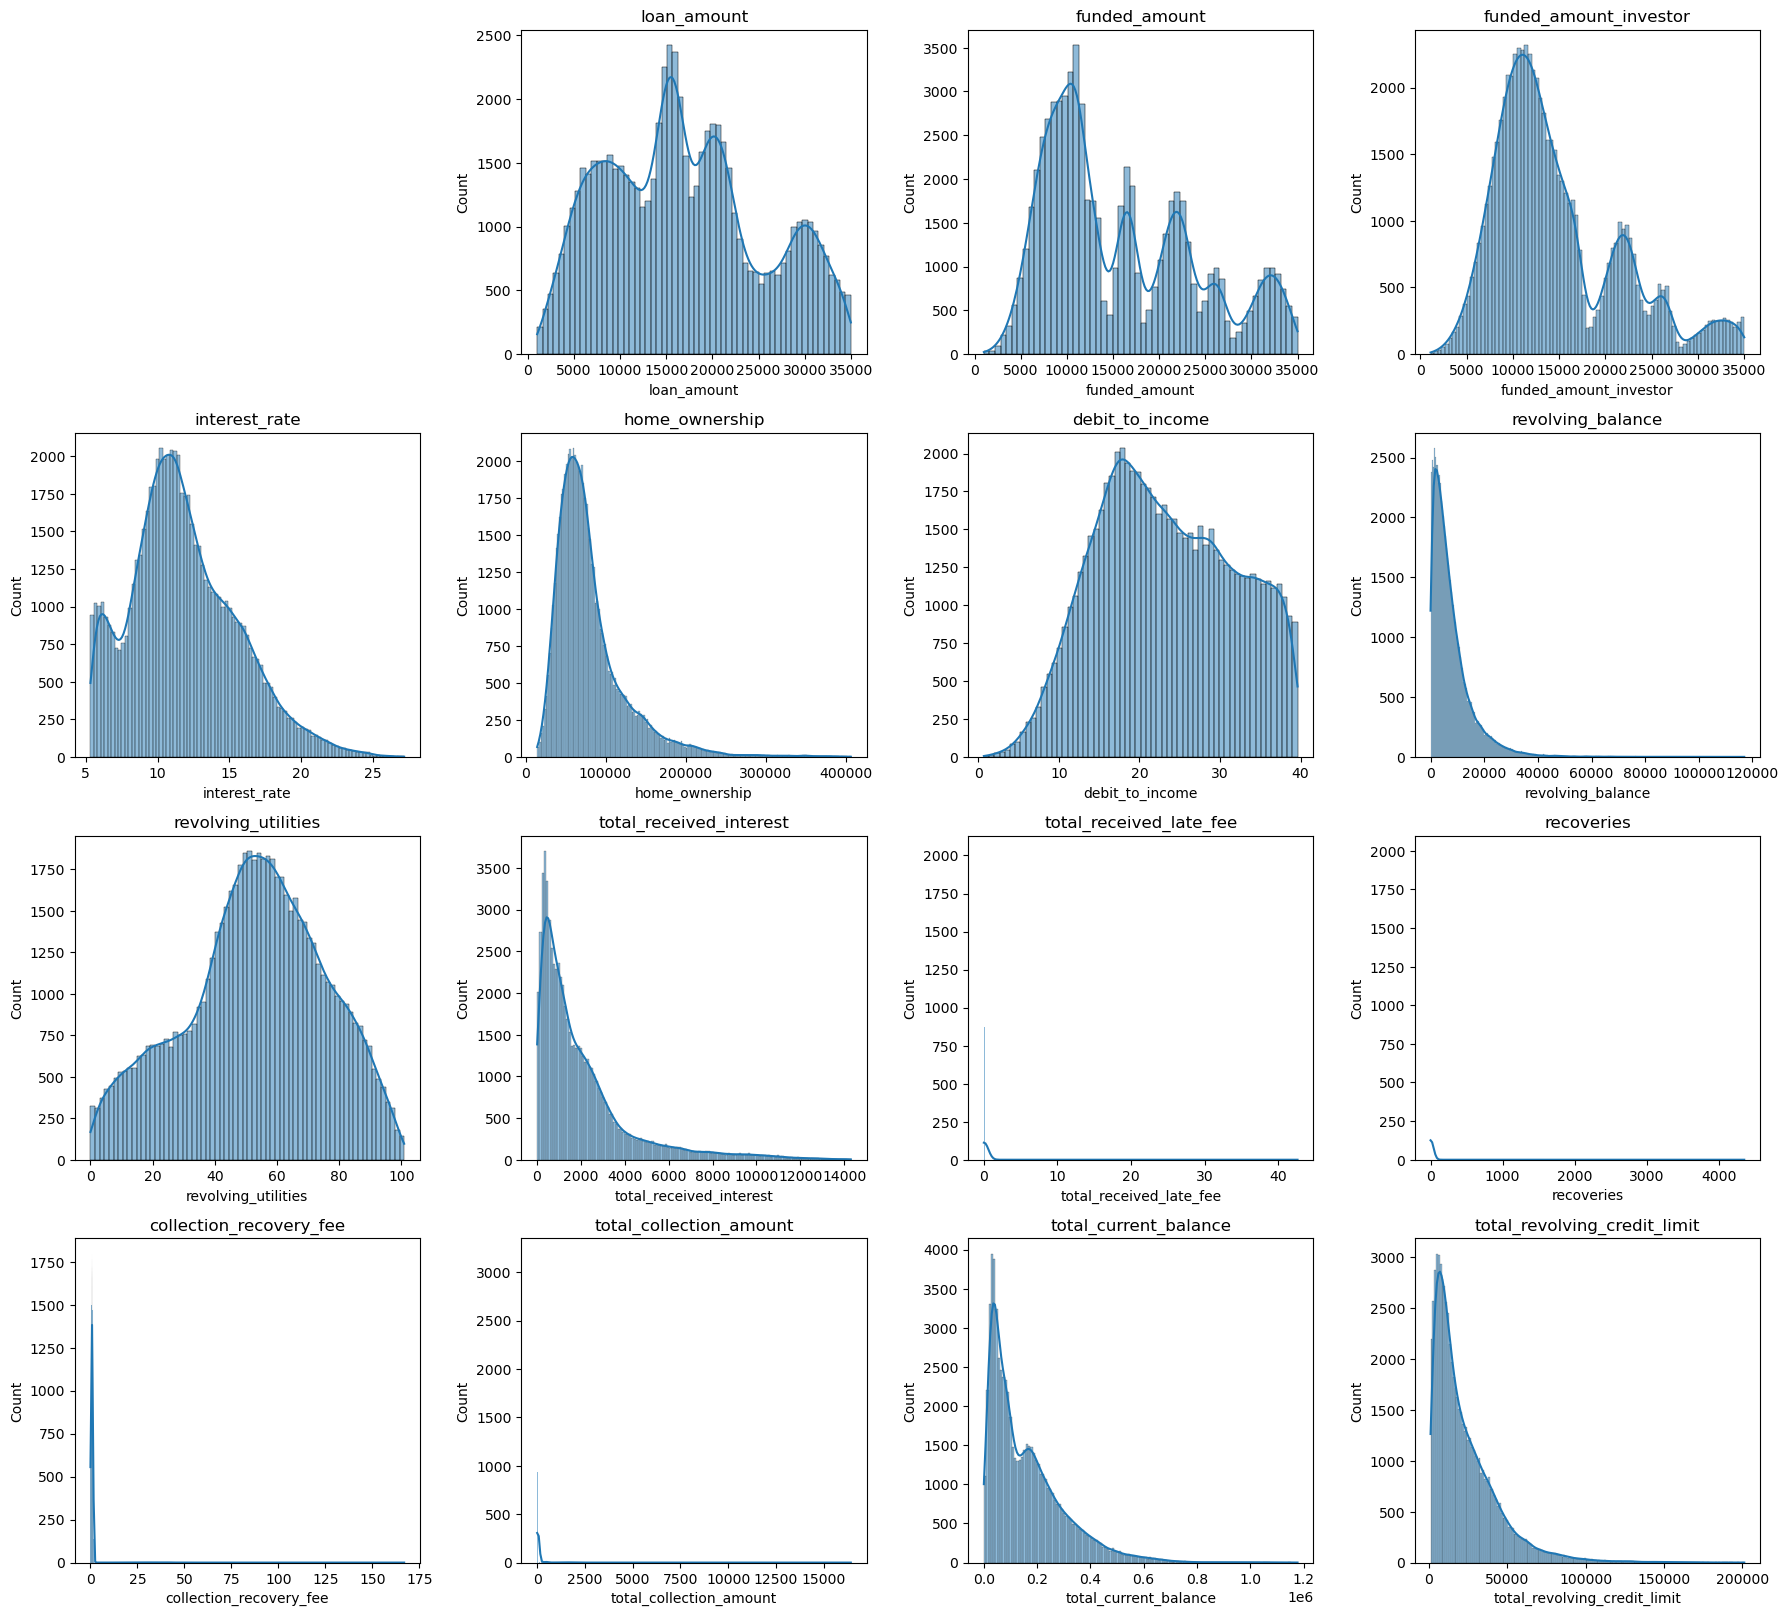

In [146]:
displot_variables(data, histplot_col)

In [147]:
# Columns to modify looking at the above distributions:

columns = ['funded_amount_investor', 'interest_rate', 'home_ownership', 'revolving_balance', 'total_received_interest', 'total_received_late_fee', 'recoveries', 'collection_recovery_fee', 'total_collection_amount', 'total_current_balance', 'total_revolving_credit_limit']

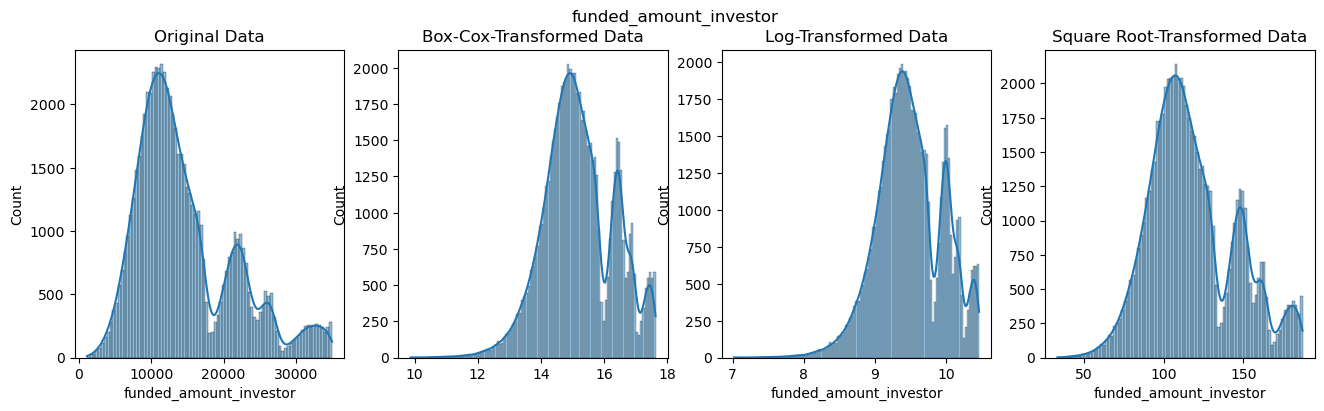

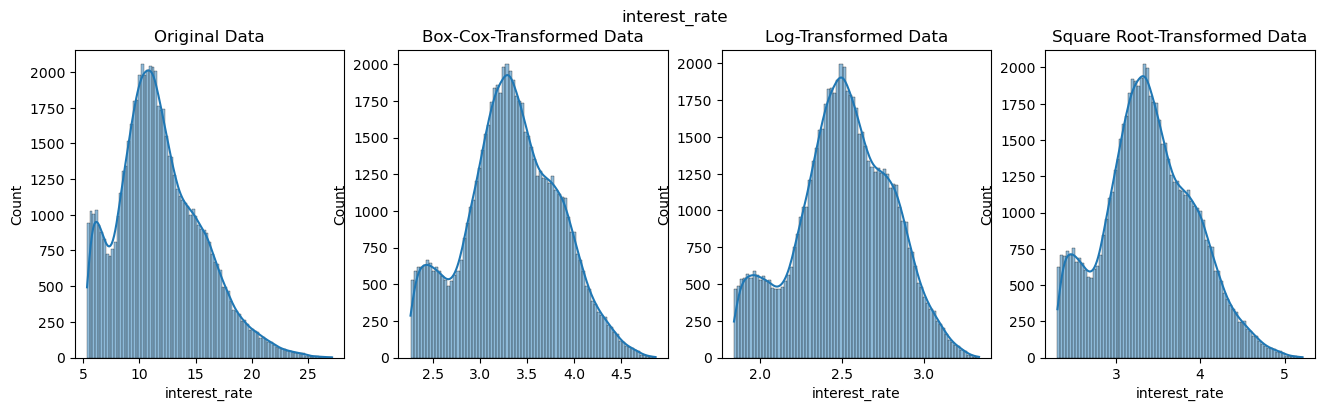

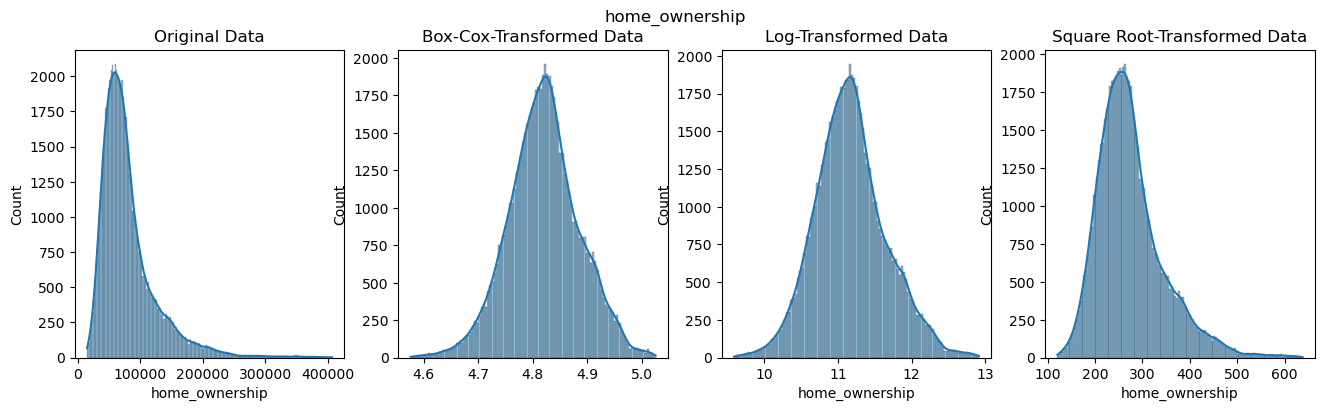

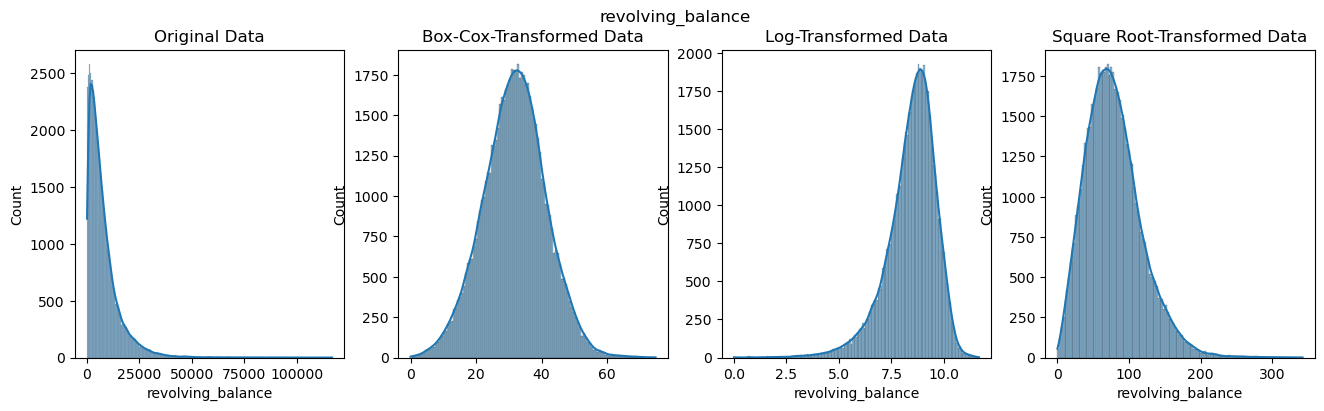

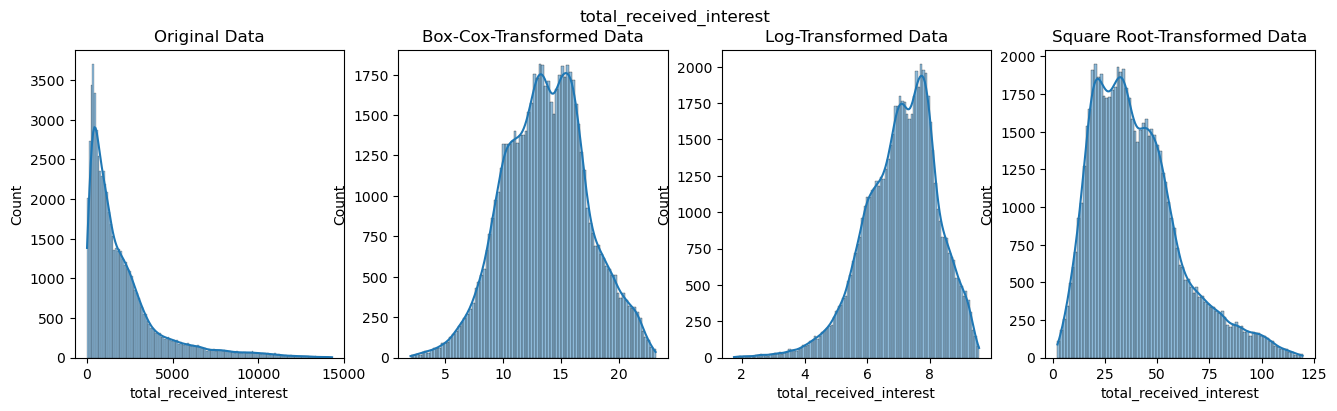

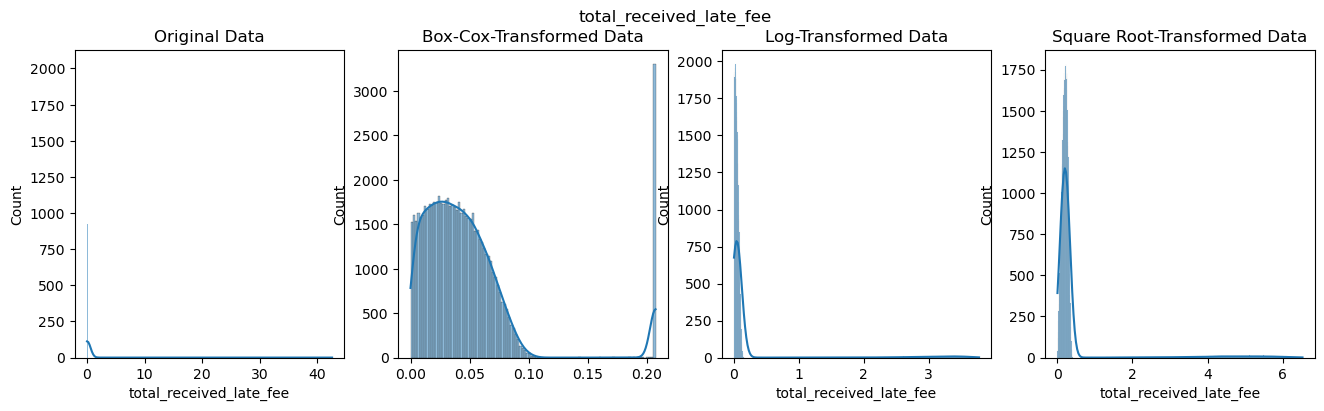

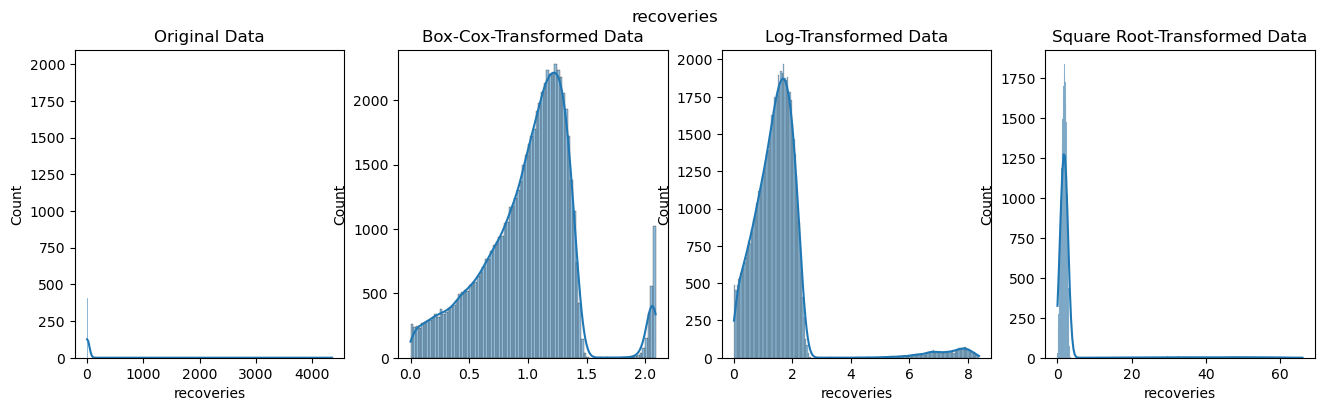

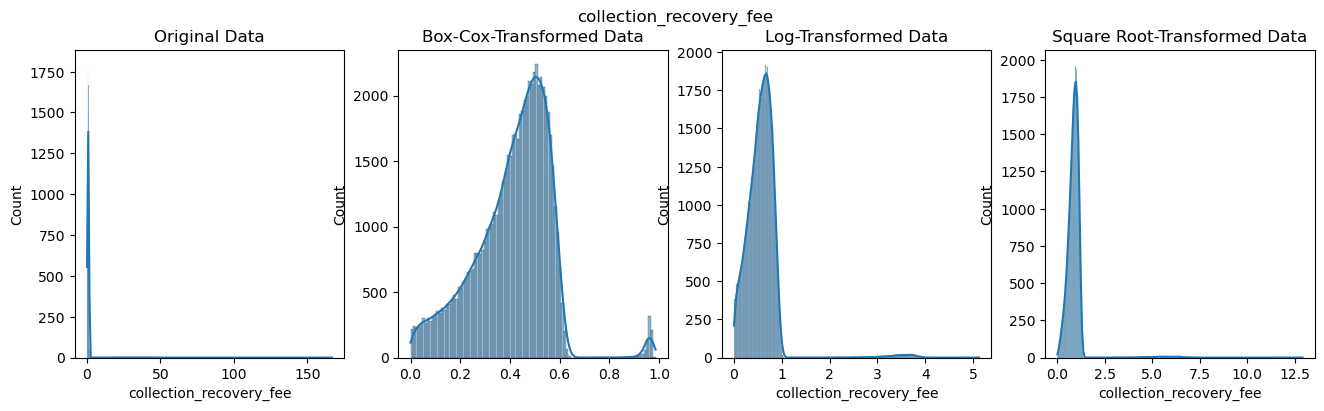

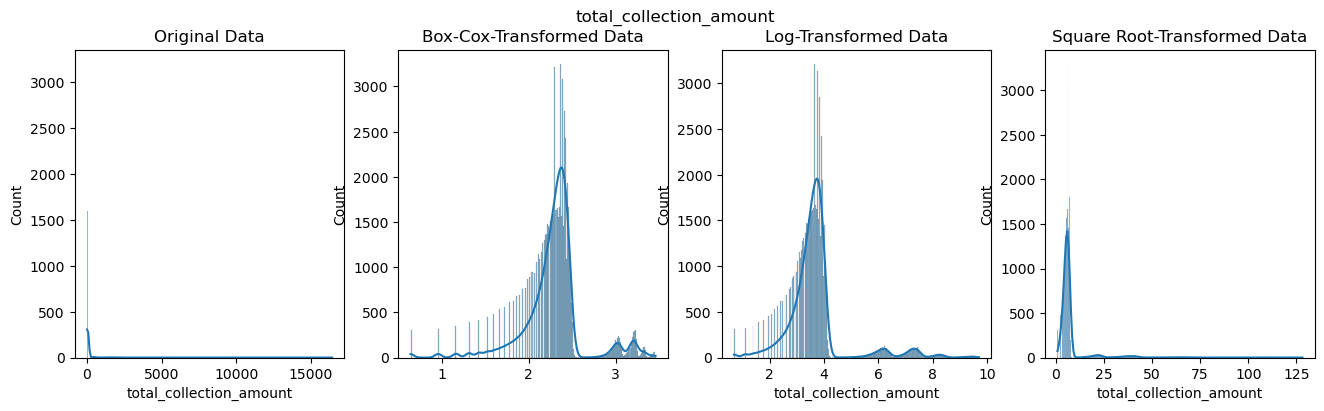

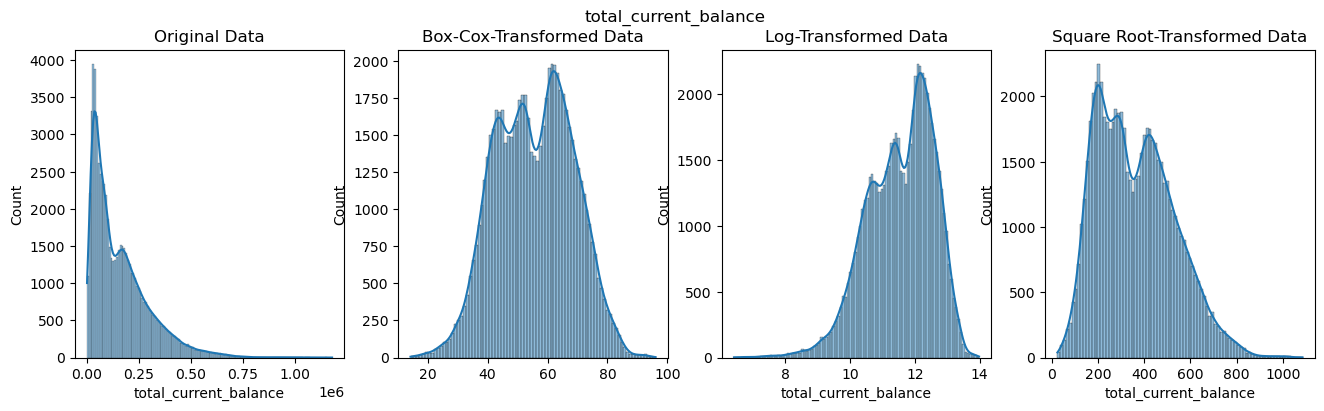

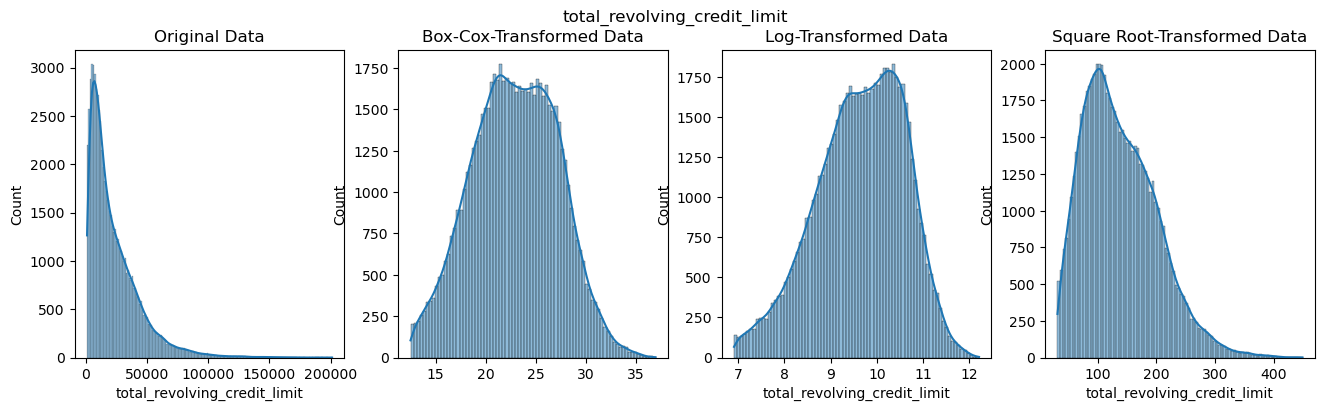

In [148]:
# Comparing the different methods:

from scipy.stats import norm, expon
from scipy.stats import boxcox


for numerical_variable in columns:
    if numerical_variable != 'loan_status':
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        fig.suptitle(numerical_variable)

        # Original data:
        sns.histplot(data[numerical_variable], kde=True, ax=axes[0])
        axes[0].set_title('Original Data')

        # Log transformation:
        log_transformed = np.log1p(data[numerical_variable])
        sns.histplot(log_transformed, kde=True, ax=axes[2])
        axes[2].set_title('Log-Transformed Data')
        
        # Square root transformation:
        sqrt_transformed = np.sqrt(data[numerical_variable])
        sns.histplot(sqrt_transformed, kde=True, ax=axes[3])
        axes[3].set_title('Square Root-Transformed Data')
        
        # Boxcox transformation
        
        boxcox_transformed, _ = boxcox(data[numerical_variable] + 1)
        sns.histplot(boxcox_transformed, kde=True, ax=axes[1])
        axes[1].set_title('Box-Cox-Transformed Data')
        
        plt.show()

In [149]:
# Selecting the best method for each feature

selected_transformations = {
 'funded_amount_investor': 'sqrt',
 'interest_rate': 'log',
 'home_ownership': 'boxcox',
 'revolving_balance': 'boxcox',
 'total_received_interest': 'boxcox',
 'total_received_late_fee': 'boxcox',
 'recoveries': 'boxcox',
 'collection_recovery_fee': 'boxcox',
 'total_collection_amount': 'boxcox',
 'total_current_balance': 'boxcox',
 'total_revolving_credit_limit': 'boxcox'      
   
}

transformed_data = data.copy()

for col, transformation in selected_transformations.items():
    if col in transformed_data.columns:
        if transformation == 'log':
            transformed_data[col] = np.log1p(transformed_data[col])
        elif transformation == 'sqrt':
            transformed_data[col] = np.sqrt(transformed_data[col])
        elif transformation == 'boxcox':
            transformed_data[col], _ = boxcox(transformed_data[col] + 1)  

In [150]:
# Df with the features with the modified distribution

transformed_data

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
0,10000,32236,111.037664,2.496094,4.935949,16.284758,1,0,13,0,48.542942,74.932551,7,16.484977,0.077581,0.946840,0.441536,0,49,2.259982,70.320980,18.977651,0,1.0,0.5,2.0,1.0,1.0,0.0,2.0,1,1,5.470487,3.663091,0.142857,0.000078,47.031425
1,3609,11940,110.417376,2.583058,4.740706,15.412409,0,0,12,0,17.956923,78.297186,13,12.053998,0.032662,0.927111,0.492394,0,109,2.453400,61.956636,23.987661,0,1.0,2.0,2.0,0.0,0.5,1.0,2.0,0,1,3.336174,0.038880,0.000000,0.000199,8.743596
2,28276,9311,146.980354,2.606083,4.856233,28.137619,0,0,14,0,23.092734,2.073040,20,12.386498,0.207331,1.157903,0.503673,0,66,2.295055,52.258677,25.079037,0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1,1,9.827805,0.070465,0.000000,0.000464,3.433416
3,11170,6954,133.705482,2.875326,4.877595,18.043730,1,0,7,0,41.466792,67.467951,12,9.348062,0.038984,0.099284,0.427663,0,39,2.354968,29.699017,29.477049,0,1.0,0.5,2.0,0.0,1.0,1.0,2.0,1,1,15.571840,0.229498,0.083333,0.000015,0.152606
4,16890,13226,116.361191,2.773107,4.756229,17.209886,1,3,13,1,21.889639,85.250761,22,7.453985,0.207331,2.056455,0.269183,0,18,3.002398,56.699032,24.361578,0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1,1,3.344535,0.068382,0.045455,0.097899,5.581691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,114.783648,2.342657,4.845062,28.105127,1,0,13,0,29.293025,97.779389,19,15.078205,0.021955,2.021414,0.462802,0,69,2.419498,61.888979,26.446400,1,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1,1,12.260682,0.119880,0.052632,0.082450,5.299408
67459,8323,11046,125.049842,2.395356,4.811830,17.694279,0,0,12,0,37.551524,15.690703,14,16.696195,0.025082,0.861399,0.582109,0,14,2.326511,37.308312,20.095624,0,1.0,2.0,2.0,0.0,0.5,1.0,2.0,1,1,5.928945,1.117397,0.000000,0.000182,2.604085
67460,15897,32921,111.038091,3.027761,4.720320,10.295774,0,0,7,1,24.335895,1.500090,9,16.173904,0.026035,1.256306,0.614377,0,137,2.013631,61.485514,27.547898,0,1.0,0.0,1.0,0.0,1.0,0.5,0.0,1,1,1.057500,0.051854,0.000000,0.000172,4.178053
67461,16567,4975,146.129000,2.651063,4.863622,7.614624,0,0,14,0,20.122334,68.481882,15,17.323672,0.060731,0.645439,0.171787,0,73,2.500113,72.841125,27.124560,0,1.0,1.0,0.5,0.0,0.0,0.0,2.0,0,1,19.485193,0.029994,0.000000,0.000233,9.247319


In [151]:
data = transformed_data

In [152]:
# Checking the final distribution selected

def displot_selected_columns(df, columns):
    num_cols = 4
    num_rows = (len(df.columns) - 1) // num_cols + 1
    
    plt.figure(figsize=(18, 4 * num_rows))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

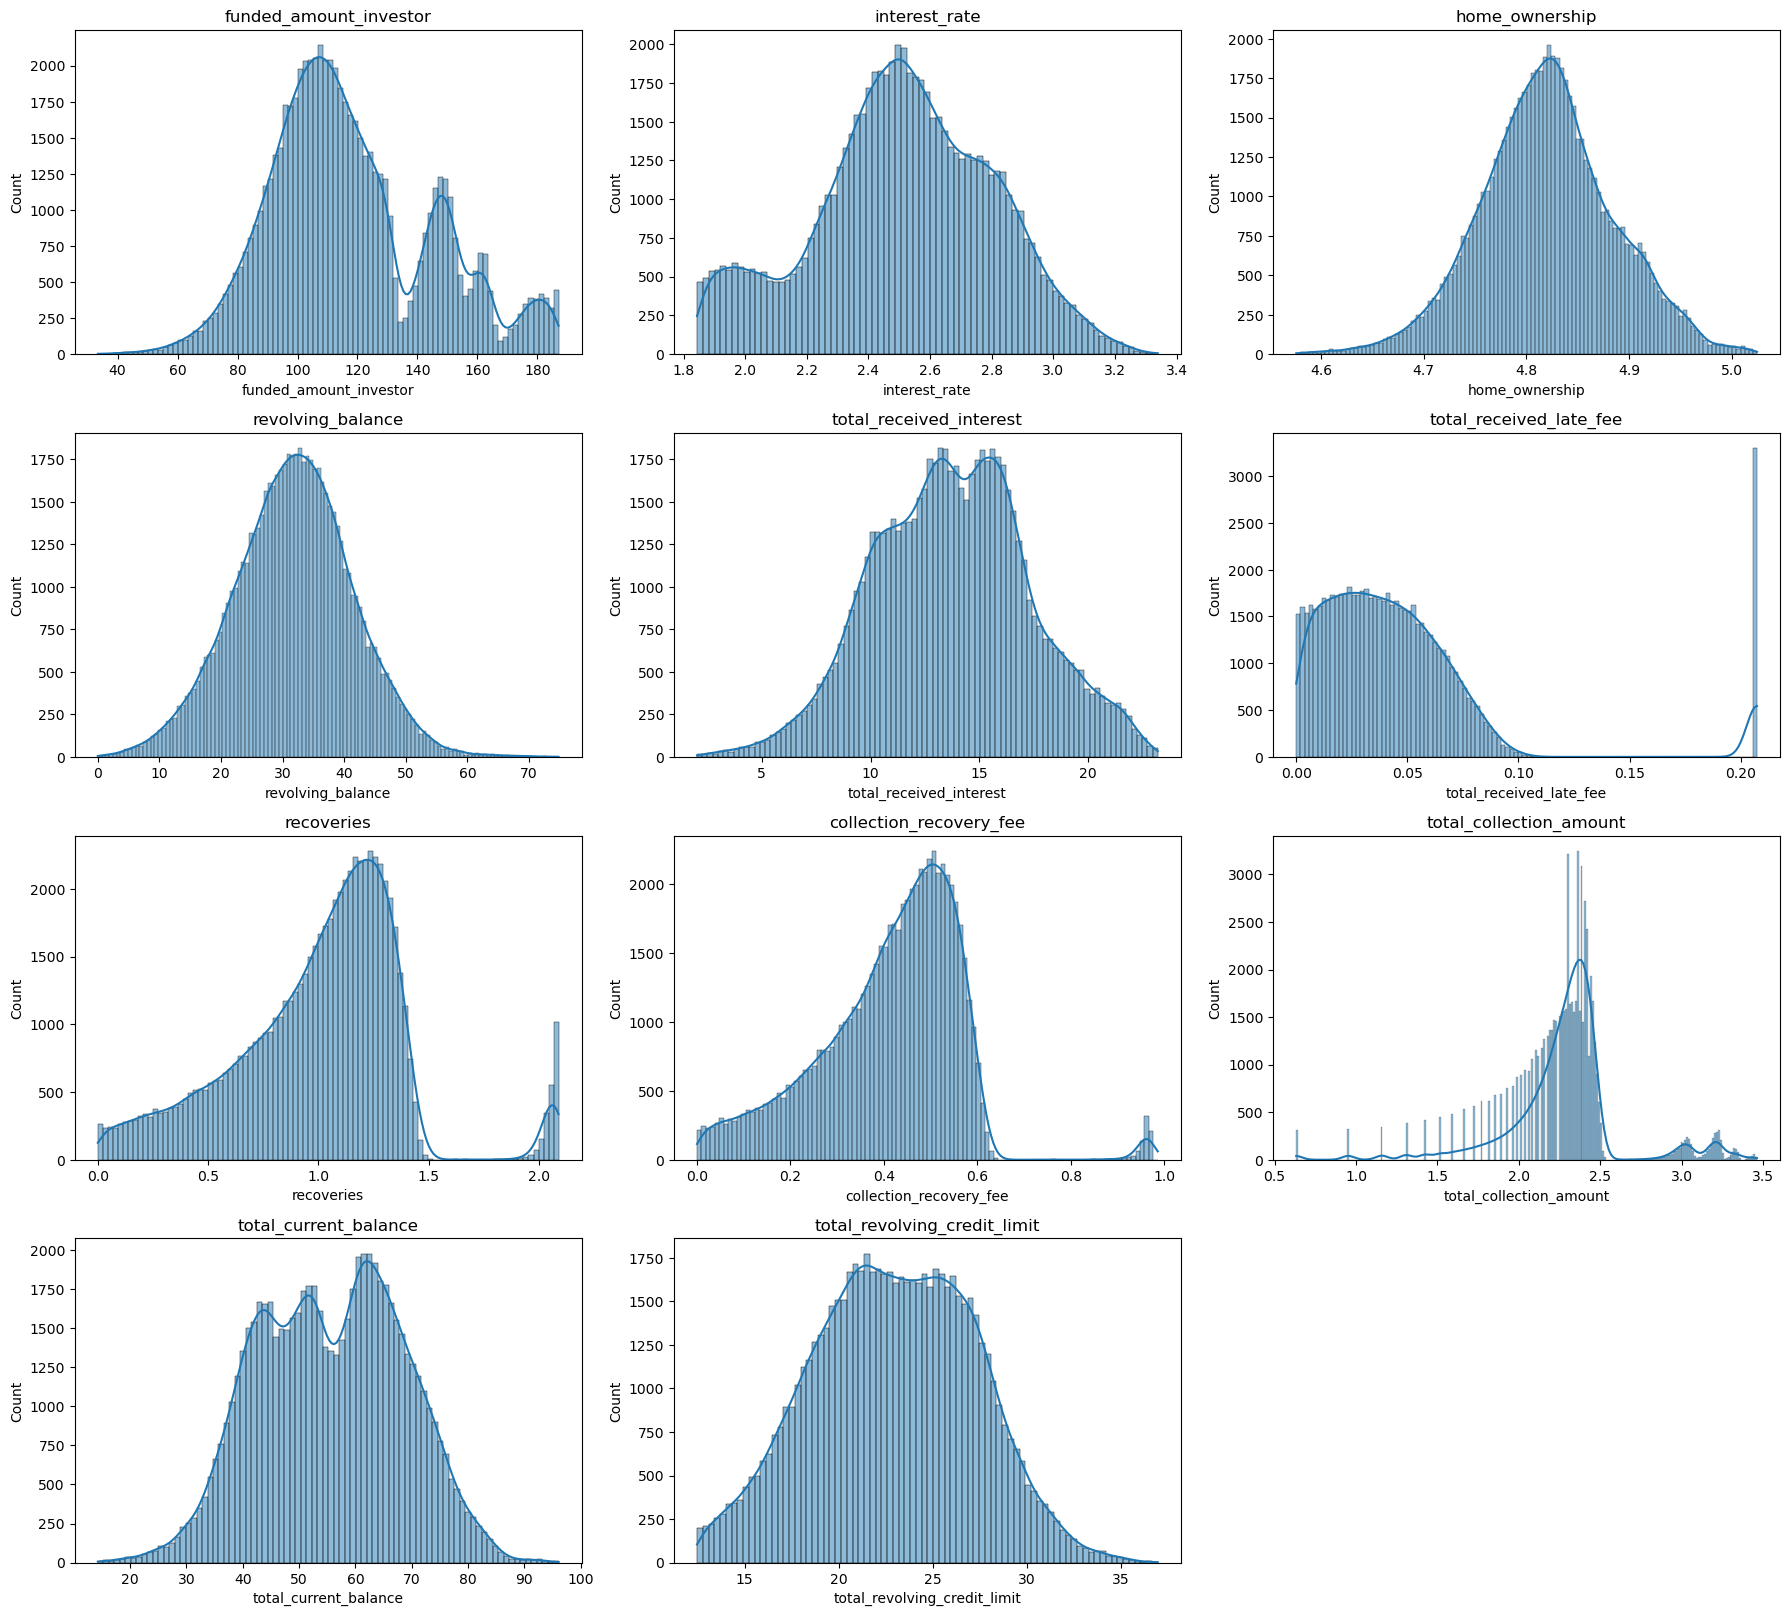

In [153]:
displot_selected_columns(transformed_data, columns)

In [154]:
# Checking outliers

def boxplots_variables(df, columns):
    num_cols = 4
    num_rows = (len(df.columns) - 1) // num_cols + 1

    plt.figure(figsize=(18, 4 * num_rows))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(data=df[col])
        plt.title(col)
        plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

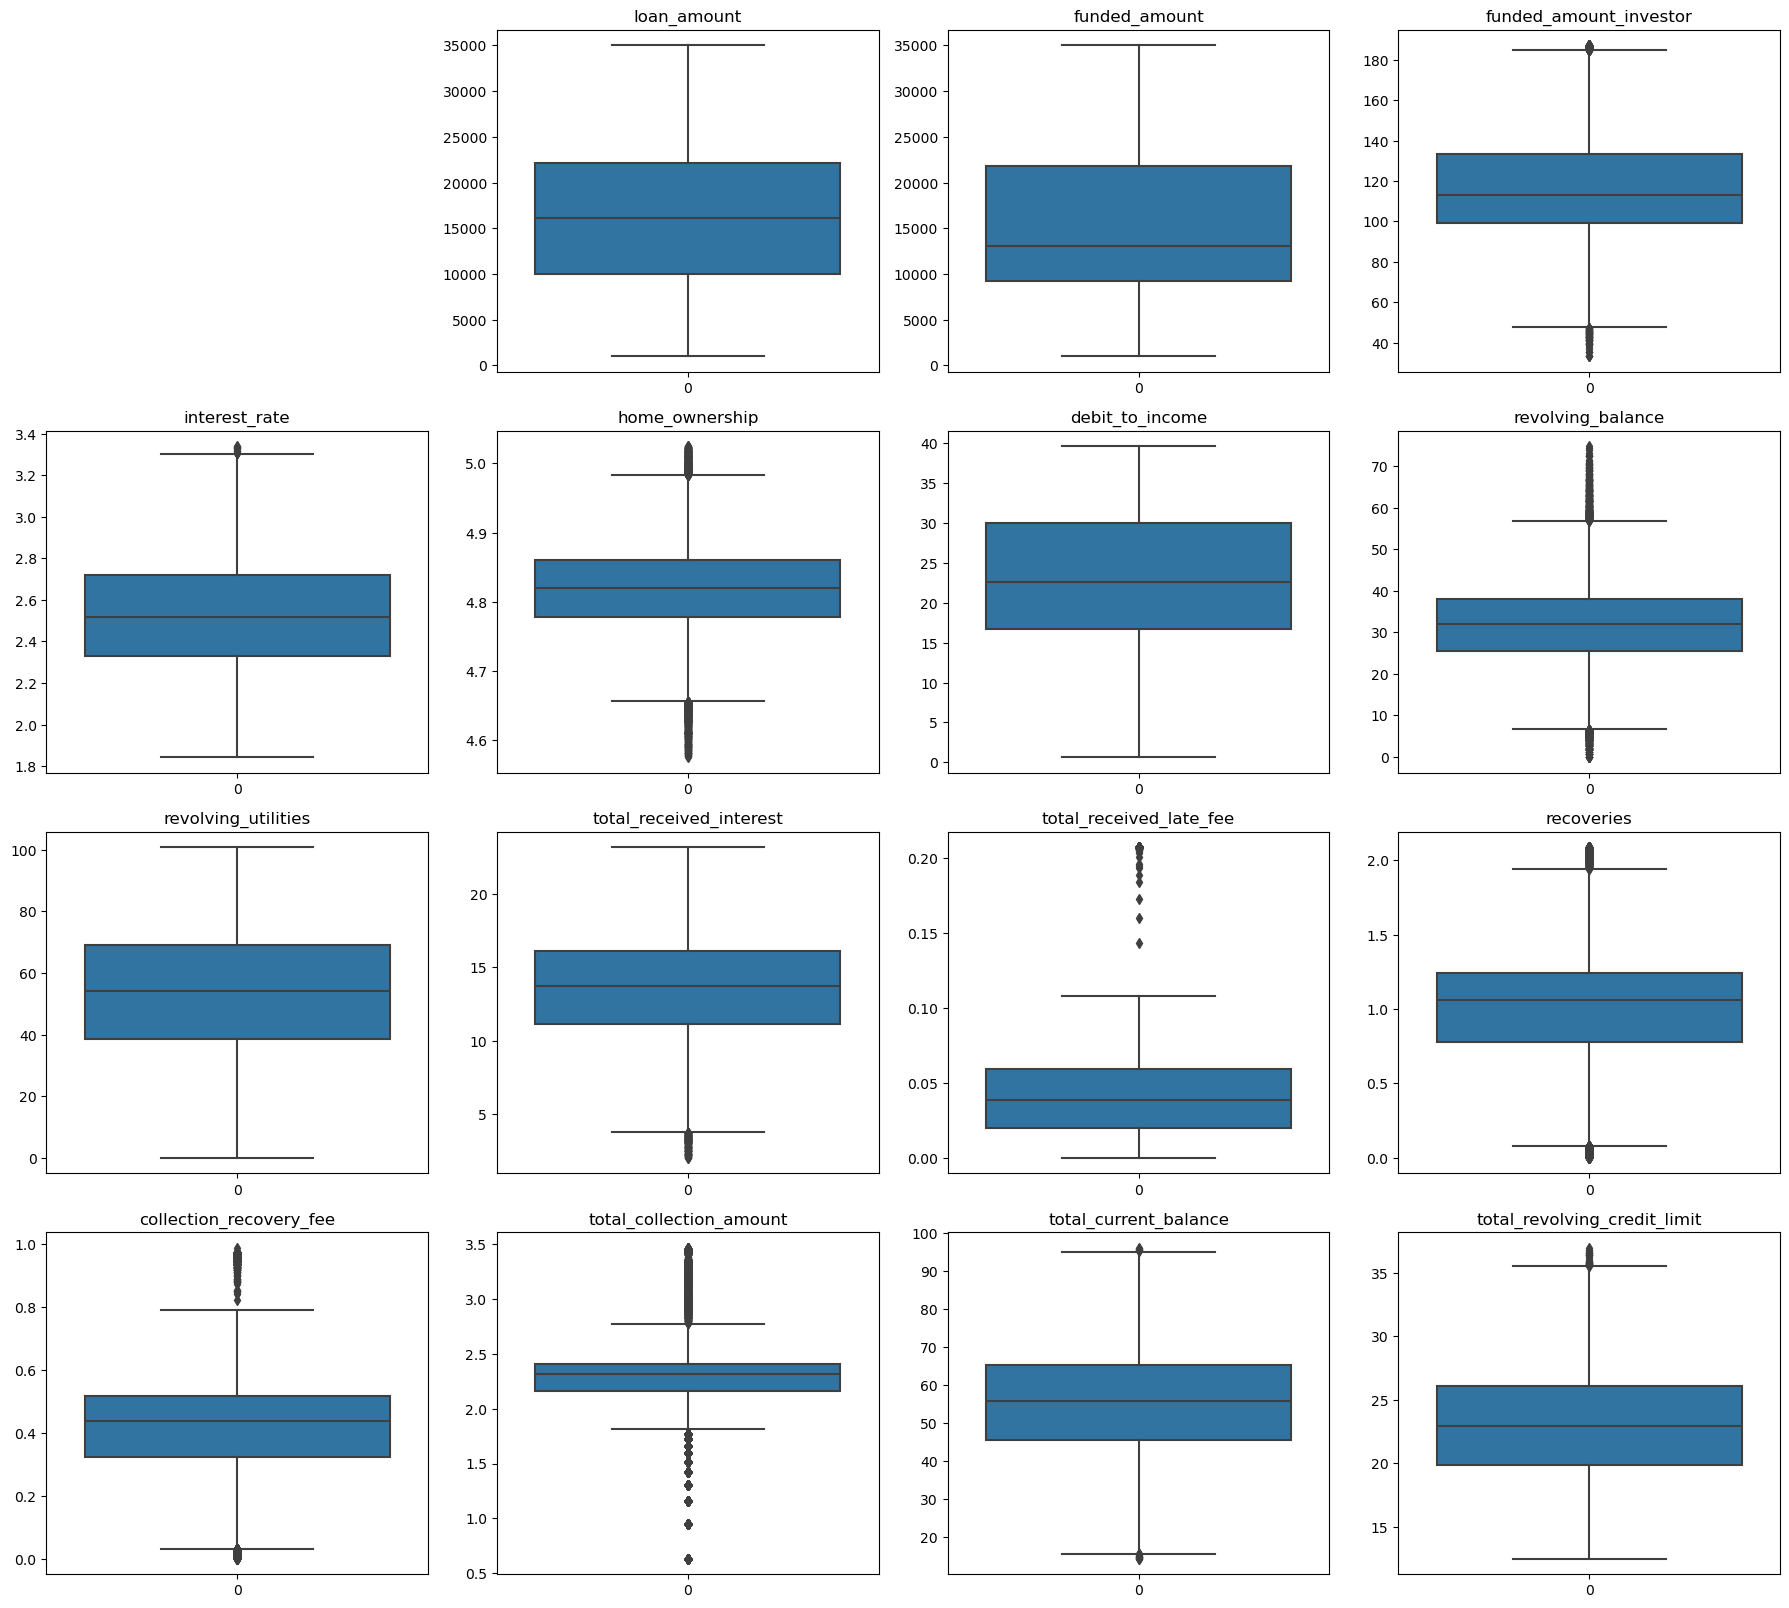

In [155]:
boxplots_variables(transformed_data, histplot_col)

In [156]:
# Since the outliers are important for our model, we are not going to do anything with them for the moment.

In [157]:
# Plotting categoricals

print(boxplot_col)

['batch_enrolled_ordinal', 'grade_ordinal', 'sub_grade_ordinal', 'employment_duration_ordinal', 'verification_status_ordinal', 'loan_title_ordinal', 'initial_list_status_ordinal', 'application_type_ordinal']


In [158]:
def plot_categorical_variables(df, columns):
    for column in columns:
        sns.countplot(data=df, x=column)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=0)
        plt.show()

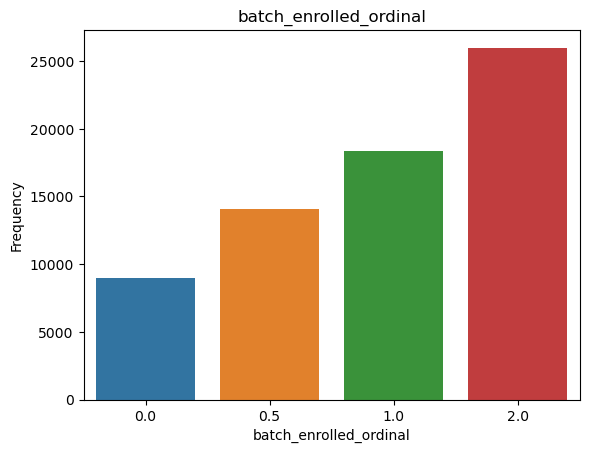

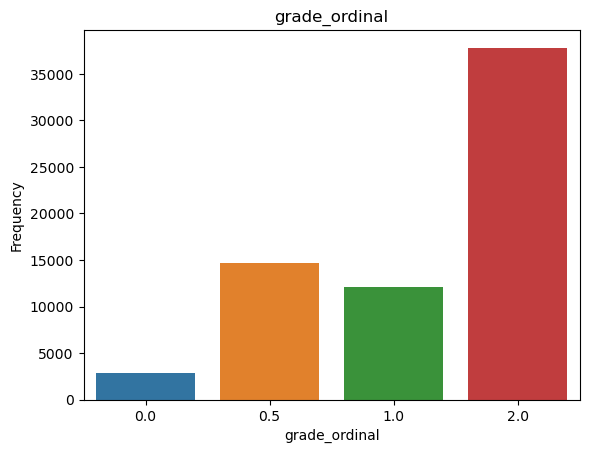

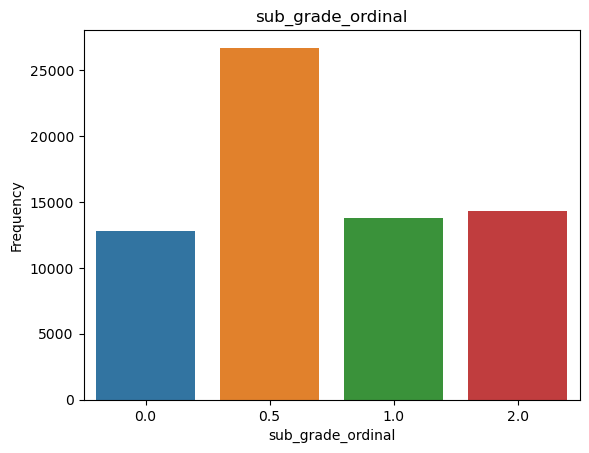

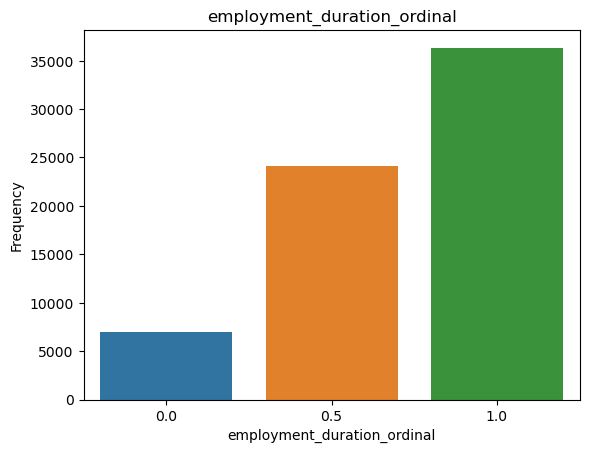

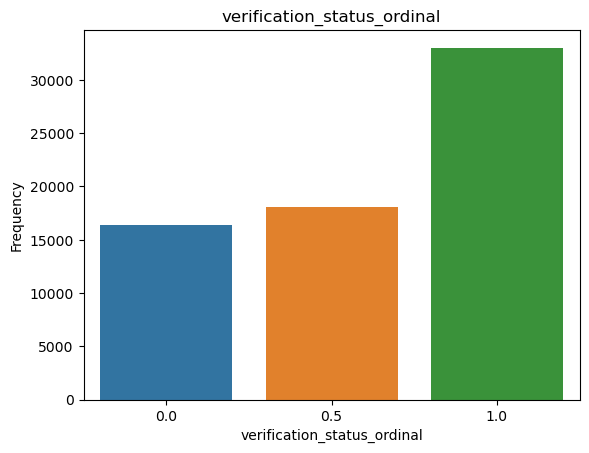

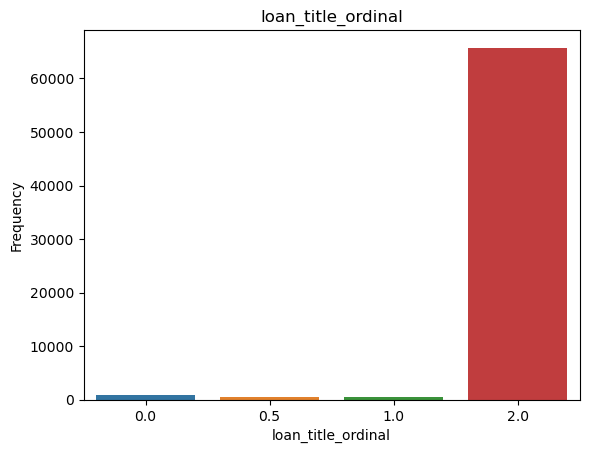

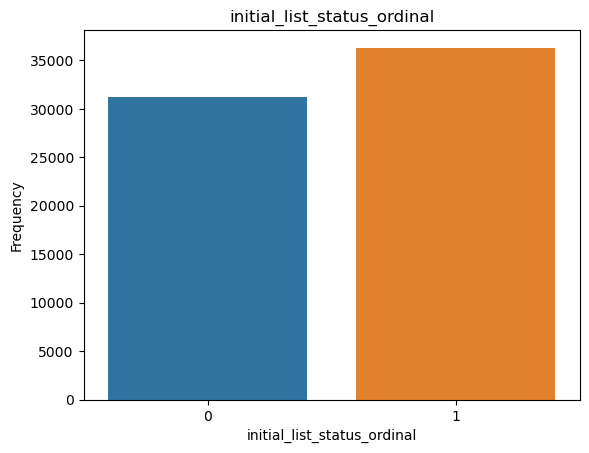

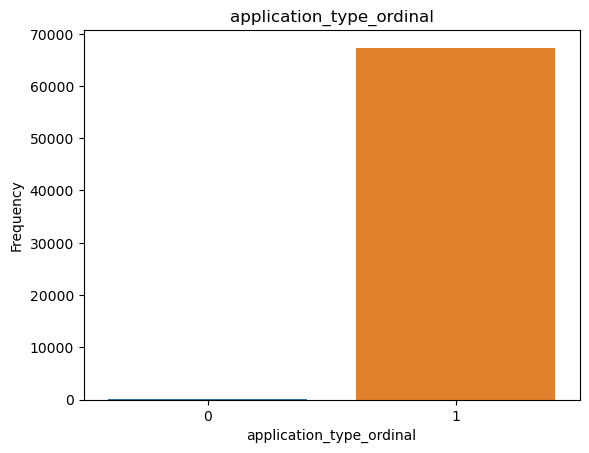

In [159]:
plot_categorical_variables(data, boxplot_col)

In [160]:
# Comments:

# After adapting the categorical columns, avoiding redundance and ordinal encoding them in proportion to the Loan S., 
# we can see that the plots shown now are clean, simplified and not redundant.

----------------------

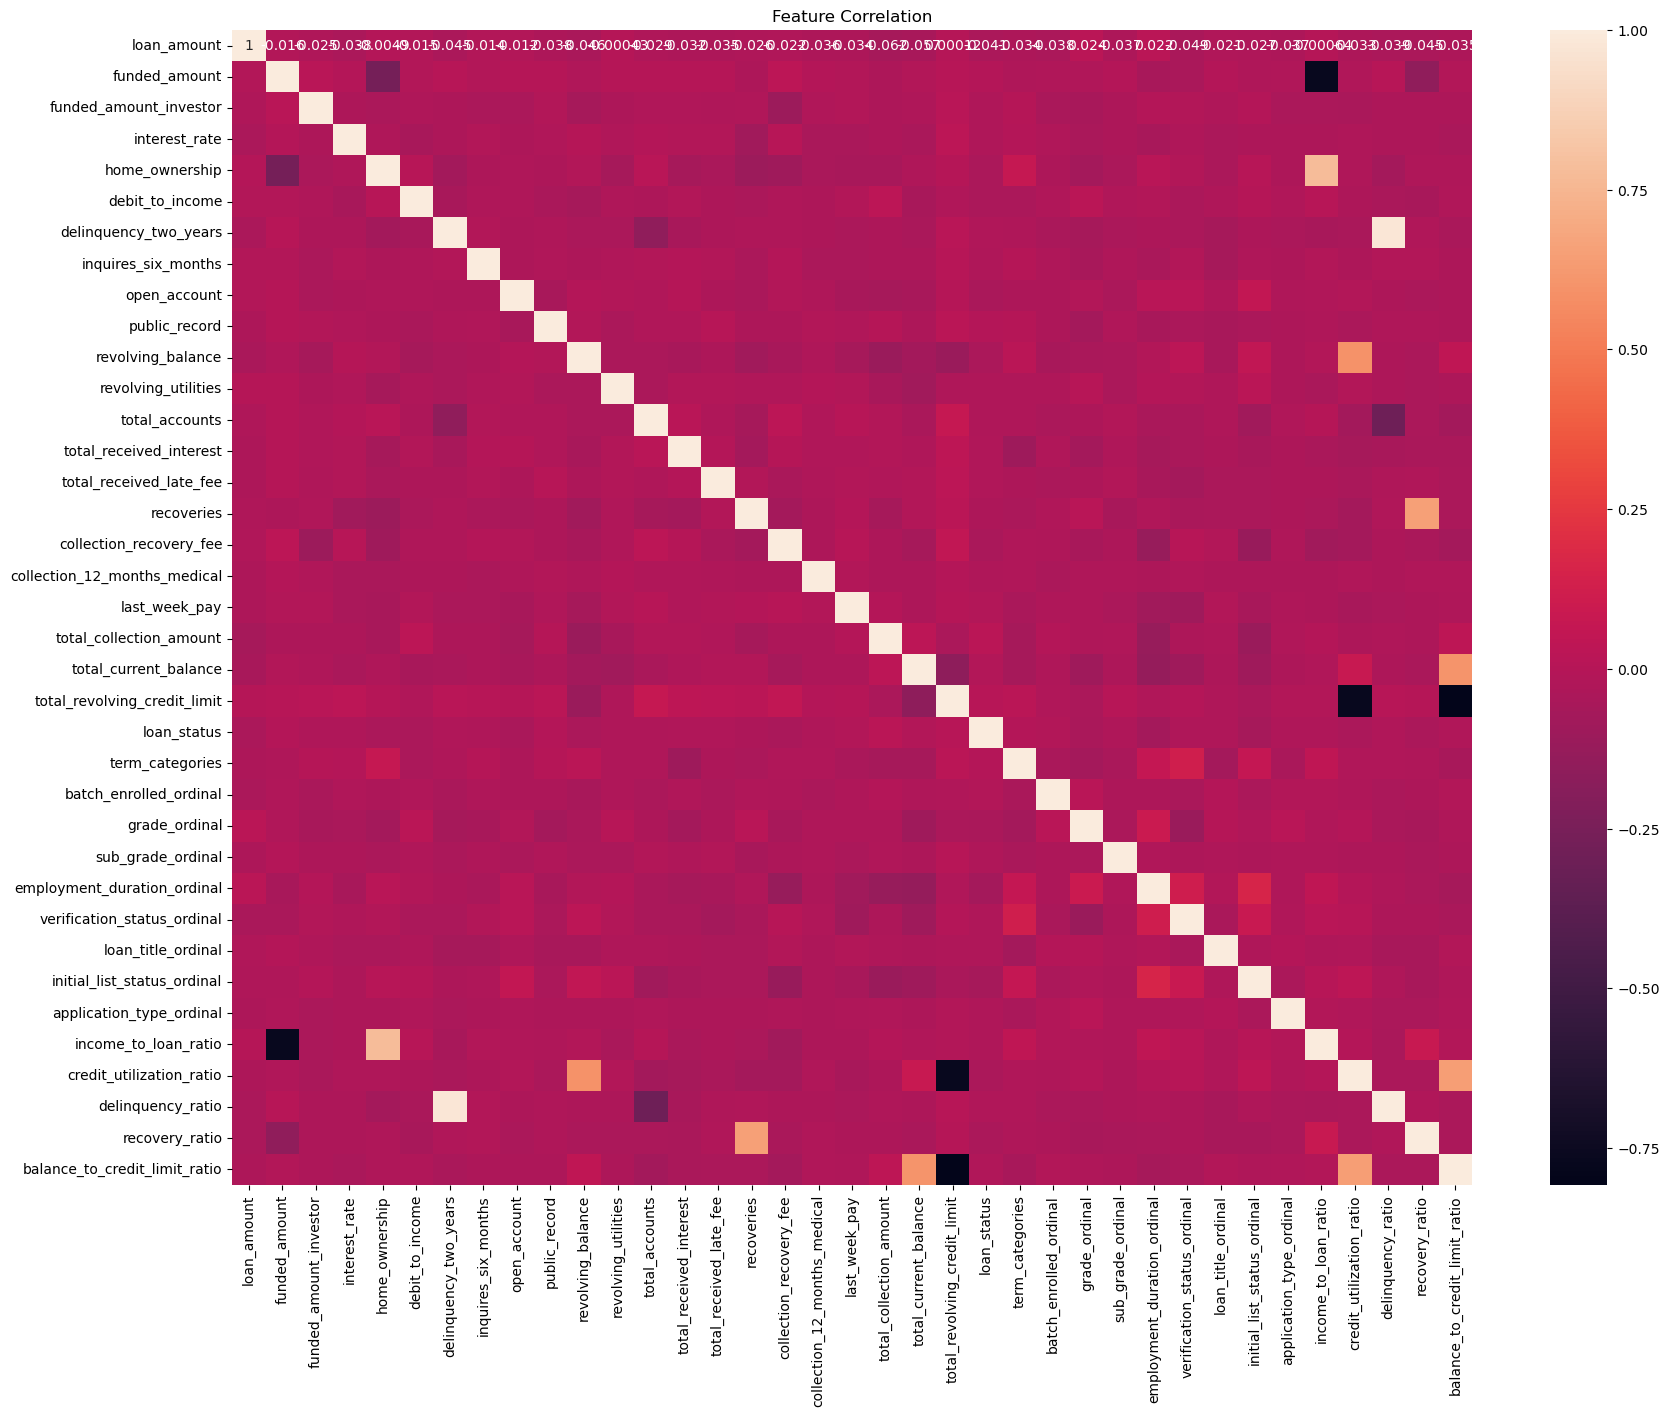

In [161]:
# Checking for correlations

corr_matrix = data.corr(method = 'pearson')

plt.subplots(1,1,figsize=(20, 15))
sns.heatmap(corr_matrix.corr(), annot=True)
plt.title("Feature Correlation");

------------

In [162]:
corr_matrix

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
loan_amount,1.000000,-0.000551,0.001755,-0.003827,0.018828,0.007959,-0.000469,0.008962,0.009088,-0.002542,-0.002994,0.014828,-0.002071,-0.001619,-0.001511,0.006039,0.001554,-0.002726,-0.002362,-0.016645,-0.010198,0.001224,-0.004473,0.002396,-0.004804,0.023497,-0.004327,0.025783,-0.007973,0.002411,0.002199,-0.003750,0.010469,-0.000088,-0.000093,-0.004517,-0.001870
funded_amount,-0.000551,1.000000,0.011400,0.001155,-0.008074,0.002347,0.011313,-0.001587,0.005755,0.003750,-0.002335,0.004460,0.008298,0.003773,0.004212,-0.002319,0.011220,0.001071,-0.003476,-0.012667,-0.002119,0.005812,0.001364,-0.000675,-0.005219,-0.006874,0.001720,-0.017322,-0.017805,-0.000014,-0.004256,-0.006554,-0.539606,-0.001435,0.007143,-0.069555,-0.000793
funded_amount_investor,0.001755,0.011400,1.000000,-0.003368,-0.001346,-0.000396,0.001268,-0.004567,-0.007688,0.005535,-0.013293,-0.003023,0.003145,0.002946,0.000197,0.004145,-0.041537,0.002459,0.005661,-0.005423,0.004223,0.005541,-0.001139,0.019289,-0.009768,-0.016709,-0.004948,0.009254,0.007492,-0.000938,0.011463,-0.005299,-0.009093,-0.008349,-0.000759,0.001482,-0.004427
interest_rate,-0.003827,0.001155,-0.003368,1.000000,0.007979,-0.009866,0.003385,0.007829,-0.003533,0.005692,0.020294,0.006636,0.007014,0.006840,0.006584,-0.024872,0.015093,-0.009576,-0.010095,-0.005902,-0.004099,0.016905,0.001697,0.016197,0.002520,-0.010191,-0.004369,-0.012430,0.000710,-0.005626,0.001531,-0.001666,-0.005695,0.002713,0.000819,0.004820,-0.009042
home_ownership,0.018828,-0.008074,-0.001346,0.007979,1.000000,0.026668,-0.004529,0.005712,0.009042,0.007156,0.020401,-0.004686,0.024949,-0.008534,-0.001849,-0.026499,-0.023622,-0.001931,-0.008406,-0.013889,0.013287,0.007326,0.002114,0.062875,0.001937,-0.017584,-0.002322,0.023005,0.009316,-0.001814,0.026008,0.003049,0.573021,0.008101,-0.007078,0.004558,0.003380
debit_to_income,0.007959,0.002347,-0.000396,-0.009866,0.026668,1.000000,-0.004007,0.002246,0.001100,-0.007813,-0.009927,0.003691,-0.005683,0.007401,0.000101,0.000150,-0.000565,-0.000716,0.008639,0.029559,-0.010364,-0.009982,-0.003057,-0.000571,0.002560,0.024462,0.003434,0.008985,-0.002424,0.001237,0.019897,0.004483,0.013882,-0.001145,-0.001756,-0.007303,0.005400
delinquency_two_years,-0.000469,0.011313,0.001268,0.003385,-0.004529,-0.004007,1.000000,0.014679,0.004904,0.006716,0.008659,0.002474,-0.003085,-0.008628,0.004114,0.009393,0.003971,0.003451,0.001160,0.001664,0.002463,0.010276,0.009990,0.013961,-0.004368,-0.011885,0.000071,0.003497,0.003214,-0.010029,0.007150,-0.000765,-0.009149,-0.002078,0.825724,0.016426,-0.005436
inquires_six_months,0.008962,-0.001587,-0.004567,0.007829,0.005712,0.002246,0.014679,1.000000,-0.002109,0.004087,0.002767,0.005150,0.007562,0.010265,0.010246,-0.004426,0.009827,-0.004436,-0.004453,-0.003157,0.003732,0.003534,0.000578,0.019951,0.001743,-0.011430,0.001557,-0.008502,0.008787,-0.015861,0.003221,-0.002990,0.004963,-0.000129,0.010141,0.012749,-0.004056
open_account,0.009088,0.005755,-0.007688,-0.003533,0.009042,0.001100,0.004904,-0.002109,1.000000,-0.010762,0.014015,0.007090,0.003486,0.014129,-0.001524,-0.005603,0.004673,0.003397,-0.013415,-0.016920,-0.007290,0.002744,-0.007073,0.002096,-0.002976,0.005956,-0.004521,0.019634,0.021356,0.000269,0.043163,0.002109,0.001891,0.010380

In [163]:
# There are no correlations above 0.90. We continue with all the selected features.

--------------

In [164]:
# Processing data

In [165]:
# Split X/y

X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [166]:
# Train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(47224, 36)

(20239, 36)

(47224,)

(20239,)

In [168]:
# Defining variables (all are already numericals):

display(X_train)
display(X_test)

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
10823,5784,22660,115.161468,2.497707,4.772831,31.904233,0,0,14,0,36.864807,35.644799,18,20.741297,0.057796,1.329361,0.011828,0,146,2.389052,60.456796,19.585104,0.5,0.0,1.0,0.0,1.0,0.0,2.0,0,1,2.188497,1.185657,0.000000,0.000311,21.408991
56039,19462,9589,150.831636,2.322779,4.796602,20.329191,1,0,8,0,42.544854,86.356995,26,11.456494,0.031764,2.081032,0.493550,0,10,2.483540,83.481854,29.100448,1.0,2.0,0.5,0.5,0.5,1.0,2.0,0,1,6.116881,0.268882,0.038462,0.320775,11.463816
32457,30348,26502,115.054915,2.426899,4.823344,32.012076,0,0,10,0,16.354491,62.054769,20,5.971581,0.035272,1.106740,0.519017,0,50,2.396976,47.600307,24.900234,0.5,2.0,2.0,0.0,0.5,1.0,2.0,1,1,2.689961,0.023947,0.000000,0.000142,2.421894
43496,19156,5306,102.492929,2.273335,4.813098,20.265629,0,0,19,0,37.922043,29.898896,9,12.366212,0.050930,1.334073,0.428401,0,25,2.316386,58.901296,29.659294,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1,1,12.457939,0.162065,0.000000,0.001345,2.375890
50204,18358,15300,134.140865,2.359636,4.821802,20.363201,1,0,11,1,39.797787,30.675106,7,8.655485,0.005682,0.879885,0.496216,0,86,2.389052,90.583177,20.926583,1.0,2.0,2.0,0.5,1.0,0.5,2.0,1,1,4.606420,1.126096,0.142857,0.000138,86.244181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,14231,6582,94.686321,2.623885,4.726650,22.445831,1,0,14,0,34.995937,55.990600,21,9.821369,0.047576,0.148965,0.532204,0,6,2.404685,64.500335,26.595350,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0,1,5.513280,0.215465,0.047619,0.000025,6.124742
6265,19467,11127,113.305817,2.844483,4.858534,26.918685,0,0,10,0,18.771220,97.503977,8,10.120805,0.068772,1.172229,0.262713,0,150,2.061621,67.955096,27.980096,1.0,2.0,2.0,0.5,0.5,1.0,2.0,0,1,8.372315,0.020398,0.000000,0.000403,5.871006
54886,34414,8818,115.695633,2.833478,4.748650,16.739171,0,0,8,0,4.728133,54.792869,10,16.033091,0.006928,0.984860,0.475195,0,89,3.322083,72.971084,18.982457,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1,1,4.765058,0.003169,0.000000,0.000312,54.938735
860,15325,6355,109.388873,3.038455,4.854608,16.793399,0,0,22,0,43.882949,44.462169,9,14.046829,0.047840,1.284405,0.406663,0,65,2.259982,64.756948,25.518054,1.0,0.5,1.0,0.5,1.0,0.0,2.0,0,1,14.218825,0.591530,0.000000,0.000968,7.696045


,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
56094,8984,7827,86.647677,1.950536,4.673827,17.621745,7,0,14,0,32.445283,37.447574,18,9.907966,0.007046,0.818848,0.240388,0,103,2.446946,64.896186,24.007931,1.0,2.0,2.0,1.0,0.5,1.0,2.0,0,1,3.309831,0.278774,0.388889,0.000231,10.578430
34597,27684,30137,146.280647,2.340327,4.858043,23.674993,0,0,30,1,23.039767,50.828934,28,16.080556,0.012342,1.033786,0.273239,0,12,2.994399,58.104358,27.240538,1.0,1.0,0.5,0.5,1.0,0.5,2.0,1,1,3.079381,0.045788,0.000000,0.000103,3.494405
1791,21374,30196,112.165337,2.011020,4.712275,9.473331,0,0,9,0,26.243479,43.844993,20,12.734673,0.046977,1.214194,0.465784,0,26,3.147890,39.755062,22.185525,0.5,0.5,2.0,2.0,1.0,1.0,2.0,1,1,1.094213,0.200042,0.000000,0.000167,2.072550
38453,32775,8531,161.877240,2.993520,4.840371,6.875724,0,0,12,0,32.659745,13.865725,7,15.694370,0.025700,1.148380,0.543511,0,7,2.206136,45.131094,26.671820,0.5,0.0,2.0,1.0,0.5,0.5,2.0,0,1,9.496244,0.166955,0.000000,0.000493,1.370276
12959,3576,8295,111.514779,2.613371,4.865687,24.763439,0,0,10,0,23.035972,6.073035,32,10.677470,0.033697,0.895774,0.314864,0,48,2.220473,79.149644,18.724529,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0,1,11.877542,0.294411,0.000000,0.000265,82.816396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26056,29423,11008,125.149856,2.799346,4.861380,35.928984,0,0,11,0,34.336853,92.530198,9,18.733175,0.052419,0.853056,0.400465,0,133,2.191135,43.772053,23.345361,0.5,1.0,0.5,1.0,0.0,0.0,2.0,1,1,8.652933,0.390617,0.000000,0.000179,2.377558
55974,30419,33916,114.621701,2.534138,4.838305,19.304667,0,0,9,0,27.077260,46.760679,17,13.947423,0.021602,0.947733,0.014777,0,152,2.465865,67.022208,15.072214,1.0,0.0,2.0,0.5,1.0,1.0,2.0,1,1,2.351491,1.379991,0.000000,0.000074,111.512944
17418,15855,9235,127.869790,2.504572,4.843649,14.266368,0,0,12,0,51.721053,73.229831,20,15.489179,0.207329,0.074357,0.395544,0,26,2.103884,71.243525,21.286296,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1,1,8.993989,2.640975,0.000000,0.000009,28.519854
233,18567,16789,104.355612,2.753478,4.958146,37.527884,0,0,14,0,38.402861,65.744158,30,13.431717,0.078498,1.197731,0.358826,0,54,2.389052,53.674977,30.994664,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1,1,12.794831,0.134357,0.000000,0.000287,1.279464


In [169]:
# Scaling MinMax Train

transformer = MinMaxScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
print(X_train_norm.shape)
X_train_scale = pd.DataFrame(X_train_norm, index = X_train.index, columns=X_train.columns)
X_train_scale.reset_index(drop = True, inplace = True)
X_train_scale

(47224, 36)


,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
0,0.140352,0.636928,0.531461,0.437457,0.439146,0.801717,0.000,0.0,0.342857,0.00,0.492962,0.353202,0.205882,0.884294,0.278753,0.636533,0.011958,0.0,0.906832,0.620643,0.564481,0.290565,0.5,0.00,0.50,0.00,1.0,0.0,1.0,0.0,1.0,0.012060,0.020107,0.000000,0.000327,0.026402
1,0.542812,0.252317,0.763840,0.320446,0.492167,0.504560,0.125,0.0,0.171429,0.00,0.568916,0.856006,0.323529,0.445644,0.153194,0.996463,0.500473,0.0,0.062112,0.654033,0.846133,0.679315,1.0,1.00,0.25,0.25,0.5,1.0,1.0,0.0,1.0,0.039648,0.004560,0.019231,0.337565,0.014128
2,0.863120,0.749978,0.530767,0.390093,0.551816,0.804486,0.000,0.0,0.228571,0.00,0.218695,0.615053,0.235294,0.186515,0.170110,0.529934,0.526299,0.0,0.310559,0.623443,0.407215,0.507715,0.5,1.00,1.00,0.00,0.5,1.0,1.0,1.0,1.0,0.015582,0.000406,0.000000,0.000150,0.002969
3,0.533808,0.126291,0.448930,0.287373,0.528962,0.502928,0.000,0.0,0.485714,0.00,0.507099,0.296232,0.073529,0.488622,0.245633,0.638789,0.434405,0.0,0.155280,0.594964,0.545453,0.702147,1.0,1.00,1.00,0.50,1.0,1.0,1.0,1.0,1.0,0.084179,0.002748,0.000000,0.001416,0.002912
4,0.510328,0.420362,0.655106,0.345100,0.548374,0.505433,0.125,0.0,0.257143,0.25,0.532182,0.303928,0.044118,0.313313,0.027394,0.421306,0.503177,0.0,0.534161,0.620643,0.933000,0.345371,1.0,1.00,1.00,0.25,1.0,0.5,1.0,1.0,1.0,0.029040,0.019097,0.071429,0.000145,0.106419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47219,0.388895,0.163837,0.398073,0.521858,0.336140,0.558899,0.125,0.0,0.342857,0.00,0.467971,0.554928,0.250000,0.368394,0.229456,0.071313,0.539672,0.0,0.037267,0.626168,0.613943,0.576969,1.0,1.00,0.50,1.00,1.0,1.0,1.0,0.0,1.0,0.035409,0.003654,0.023810,0.000027,0.007539
47220,0.542959,0.297572,0.519373,0.669417,0.630305,0.673727,0.000,0.0,0.228571,0.00,0.251011,0.966527,0.058824,0.382541,0.331694,0.561292,0.266382,0.0,0.931677,0.504936,0.656203,0.633543,1.0,1.00,1.00,0.25,0.5,1.0,1.0,0.0,1.0,0.055487,0.000346,0.000000,0.000424,0.007226
47221,0.982758,0.229631,0.534941,0.662056,0.385212,0.412396,0.000,0.0,0.171429,0.00,0.063225,0.543052,0.088235,0.661860,0.033401,0.471573,0.481860,0.0,0.552795,0.950356,0.717561,0.265944,1.0,0.50,0.50,0.00,0.0,0.0,1.0,1.0,1.0,0.030154,0.000054,0.000000,0.000328,0.067783
47222,0.421085,0.157158,0.493855,0.799167,0.621548,0.413788,0.000,0.0,0.571429,0.00,0.586809,0.440625,0.073529,0.568021,0.230733,0.615007,0.412361,0.0,0.403727,0.575032,0.617082,0.532956,1.0,0.25,0.50,0.25,1.0,0.0,1.0,0.0,1.0,0.096545,0.010032,0.000000,0.001019,0.009478


In [170]:
# Scaling MinMax Test

X_test_norm = transformer.transform(X_test)
print(X_test_norm.shape)
X_test_scale = pd.DataFrame(X_test_norm, index = X_test.index, columns=X_test.columns)
X_test_scale.reset_index(drop = True, inplace=True)
X_test_scale

(20239, 36)


,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio
0,0.234508,0.200471,0.345704,0.071450,0.218319,0.435053,0.875,0.0,0.342857,0.00,0.433863,0.371076,0.205882,0.372485,0.033971,0.392079,0.243741,0.0,0.639752,0.641102,0.618785,0.471260,1.0,1.00,1.00,0.50,0.5,1.0,1.0,0.0,1.0,0.019935,0.004728,0.194444,0.000243,0.013036
1,0.784735,0.856937,0.734192,0.332184,0.629210,0.590454,0.000,0.0,0.800000,0.25,0.308091,0.503750,0.352941,0.664102,0.059515,0.495001,0.277055,0.0,0.074534,0.834560,0.535705,0.603329,1.0,0.50,0.25,0.25,1.0,0.5,1.0,1.0,1.0,0.018317,0.000777,0.000000,0.000109,0.004293
2,0.599070,0.858673,0.511943,0.111908,0.304076,0.225865,0.000,0.0,0.200000,0.00,0.350932,0.434506,0.235294,0.506030,0.226566,0.581387,0.472316,0.0,0.161491,0.888800,0.311248,0.396806,0.5,0.25,1.00,1.00,1.0,1.0,1.0,1.0,1.0,0.004375,0.003392,0.000000,0.000176,0.002538
3,0.934532,0.221186,0.835799,0.769109,0.589793,0.159179,0.000,0.0,0.285714,0.00,0.436731,0.137266,0.044118,0.645857,0.123943,0.549872,0.551139,0.0,0.043478,0.556004,0.377010,0.580094,0.5,0.00,1.00,0.50,0.5,0.5,1.0,0.0,1.0,0.063380,0.002831,0.000000,0.000519,0.001671
4,0.075384,0.214242,0.507705,0.514825,0.646260,0.618397,0.000,0.0,0.228571,0.00,0.308040,0.060002,0.411765,0.408840,0.162515,0.428915,0.319268,0.0,0.298137,0.561071,0.793140,0.255406,1.0,0.00,0.00,0.00,0.0,1.0,1.0,0.0,1.0,0.080103,0.004993,0.000000,0.000279,0.102188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20234,0.835903,0.294071,0.596532,0.639225,0.636654,0.905041,0.000,0.0,0.257143,0.00,0.459157,0.917212,0.073529,0.789422,0.252816,0.408459,0.406076,0.0,0.826087,0.550703,0.360386,0.444191,0.5,0.50,0.25,0.50,0.0,0.0,1.0,1.0,1.0,0.057458,0.006624,0.000000,0.000189,0.002915
20235,0.865209,0.968133,0.527945,0.461826,0.585186,0.478258,0.000,0.0,0.200000,0.00,0.362081,0.463414,0.191176,0.563325,0.104177,0.453795,0.014948,0.0,0.944099,0.647787,0.644792,0.106191,1.0,0.00,1.00,0.25,1.0,1.0,1.0,1.0,1.0,0.013205,0.023403,0.000000,0.000078,0.137604
20236,0.436680,0.241901,0.614252,0.442049,0.597104,0.348913,0.000,0.0,0.285714,0.00,0.691621,0.725852,0.235294,0.636163,0.999991,0.035588,0.401086,0.0,0.161491,0.519871,0.696429,0.360068,1.0,0.50,1.00,0.25,0.5,1.0,0.5,1.0,1.0,0.059853,0.044788,0.000000,0.000009,0.035178
20237,0.516477,0.464175,0.461065,0.608544,0.852489,0.946089,0.000,0.0,0.342857,0.00,0.513529,0.651633,0.382353,0.538961,0.378601,0.573504,0.363849,0.0,0.335404,0.620643,0.481523,0.756704,1.0,0.00,1.00,1.00,0.0,1.0,1.0,1.0,1.0,0.086545,0.002279,0.000000,0.000302,0.001559


In [171]:
X_train = X_train_scale

X_test = X_test_scale

In [172]:
# Reset Indexes

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [173]:
# Concatenating

data = pd.concat([X_train,y_train],axis = 1)
data

,loan_amount,funded_amount,funded_amount_investor,interest_rate,home_ownership,debit_to_income,delinquency_two_years,inquires_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,total_collection_amount,total_current_balance,total_revolving_credit_limit,term_categories,batch_enrolled_ordinal,grade_ordinal,sub_grade_ordinal,employment_duration_ordinal,verification_status_ordinal,loan_title_ordinal,initial_list_status_ordinal,application_type_ordinal,income_to_loan_ratio,credit_utilization_ratio,delinquency_ratio,recovery_ratio,balance_to_credit_limit_ratio,loan_status
0,0.140352,0.636928,0.531461,0.437457,0.439146,0.801717,0.000,0.0,0.342857,0.00,0.492962,0.353202,0.205882,0.884294,0.278753,0.636533,0.011958,0.0,0.906832,0.620643,0.564481,0.290565,0.5,0.00,0.50,0.00,1.0,0.0,1.0,0.0,1.0,0.012060,0.020107,0.000000,0.000327,0.026402,0
1,0.542812,0.252317,0.763840,0.320446,0.492167,0.504560,0.125,0.0,0.171429,0.00,0.568916,0.856006,0.323529,0.445644,0.153194,0.996463,0.500473,0.0,0.062112,0.654033,0.846133,0.679315,1.0,1.00,0.25,0.25,0.5,1.0,1.0,0.0,1.0,0.039648,0.004560,0.019231,0.337565,0.014128,0
2,0.863120,0.749978,0.530767,0.390093,0.551816,0.804486,0.000,0.0,0.228571,0.00,0.218695,0.615053,0.235294,0.186515,0.170110,0.529934,0.526299,0.0,0.310559,0.623443,0.407215,0.507715,0.5,1.00,1.00,0.00,0.5,1.0,1.0,1.0,1.0,0.015582,0.000406,0.000000,0.000150,0.002969,0
3,0.533808,0.126291,0.448930,0.287373,0.528962,0.502928,0.000,0.0,0.485714,0.00,0.507099,0.296232,0.073529,0.488622,0.245633,0.638789,0.434405,0.0,0.155280,0.594964,0.545453,0.702147,1.0,1.00,1.00,0.50,1.0,1.0,1.0,1.0,1.0,0.084179,0.002748,0.000000,0.001416,0.002912,0
4,0.510328,0.420362,0.655106,0.345100,0.548374,0.505433,0.125,0.0,0.257143,0.25,0.532182,0.303928,0.044118,0.313313,0.027394,0.421306,0.503177,0.0,0.534161,0.620643,0.933000,0.345371,1.0,1.00,1.00,0.25,1.0,0.5,1.0,1.0,1.0,0.029040,0.019097,0.071429,0.000145,0.106419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47219,0.388895,0.163837,0.398073,0.521858,0.336140,0.558899,0.125,0.0,0.342857,0.00,0.467971,0.554928,0.250000,0.368394,0.229456,0.071313,0.539672,0.0,0.037267,0.626168,0.613943,0.576969,1.0,1.00,0.50,1.00,1.0,1.0,1.0,0.0,1.0,0.035409,0.003654,0.023810,0.000027,0.007539,0
47220,0.542959,0.297572,0.519373,0.669417,0.630305,0.673727,0.000,0.0,0.228571,0.00,0.251011,0.966527,0.058824,0.382541,0.331694,0.561292,0.266382,0.0,0.931677,0.504936,0.656203,0.633543,1.0,1.00,1.00,0.25,0.5,1.0,1.0,0.0,1.0,0.055487,0.000346,0.000000,0.000424,0.007226,0
47221,0.982758,0.229631,0.534941,0.662056,0.385212,0.412396,0.000,0.0,0.171429,0.00,0.063225,0.543052,0.088235,0.661860,0.033401,0.471573,0.481860,0.0,0.552795,0.950356,0.717561,0.265944,1.0,0.50,0.50,0.00,0.0,0.0,1.0,1.0,1.0,0.030154,0.000054,0.000000,0.000328,0.067783,0
47222,0.421085,0.157158,0.493855,0.799167,0.621548,0.413788,0.000,0.0,0.571429,0.00,0.586809,0.440625,0.073529,0.568021,0.230733,0.615007,0.412361,0.0,0.403727,0.575032,0.617082,0.532956,1.0,0.25,0.50,0.25,1.0,0.0,1.0,0.0,1.0,0.096545,0.010032,0.000000,0.001019,0.009478,0


------------

In [174]:
# Let's run a model with the imbalanced data just to see it

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)

print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.9070811451804167
TestSet =  0.9084440930876031


In [175]:
# Unbalanced

y_train.value_counts()

loan_status
0    42836
1     4388
Name: count, dtype: int64

In [176]:
y_test.value_counts()

loan_status
0    18386
1     1853
Name: count, dtype: int64

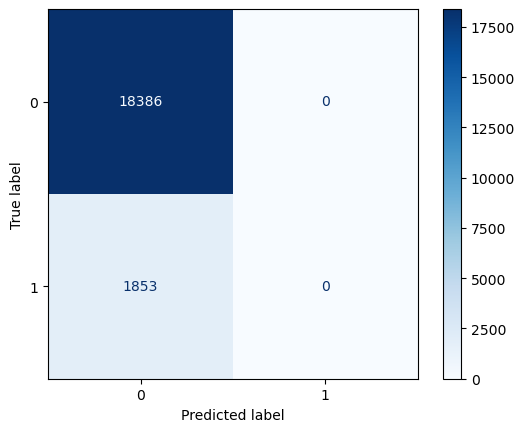

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [178]:
# Comments:

# From the confusion matrix we can see that our model only predicted NO default.

# It shows the impact of the imbalance on our predictions.

------------------

In [179]:
# Fixing imbalance with SMOTE

In [180]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [181]:
y_train_smote.value_counts()

loan_status
0    42836
1    42836
Name: count, dtype: int64

In [182]:
display(X_train_smote.shape)
display(y_train_smote.shape)

(85672, 36)

(85672,)

------------------

In [183]:
# Selecting the best Classifier model

In [184]:
def select_model(models, X_train_smote, y_train_smote, X_test, y_test):
    for model in models:
        model.fit(X_train_smote, y_train_smote)
        train_preds = model.predict(X_train_smote)
        test_preds = model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train_smote, train_preds)
        test_accuracy = accuracy_score(y_test, test_preds)
        
        train_precision = precision_score(y_train_smote, train_preds)
        test_precision = precision_score(y_test, test_preds)
        
        train_recall = recall_score(y_train_smote, train_preds)
        test_recall = recall_score(y_test, test_preds)
        
        train_f1 = f1_score(y_train_smote, train_preds)
        test_f1 = f1_score(y_test, test_preds)
        
        print(f"{model.__class__.__name__}:")
        print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
        print(f"Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")
        print("---------------------------------------")

In [185]:
# List of Classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

In [186]:
select_model(classifiers, X_train_smote, y_train_smote, X_test, y_test)

LogisticRegression:
Train - Accuracy: 0.5504, Precision: 0.5468, Recall: 0.5884, F1: 0.5668
Test - Accuracy: 0.5141, Precision: 0.0997, Recall: 0.5364, F1: 0.1682
---------------------------------------
KNeighborsClassifier:
Train - Accuracy: 0.8365, Precision: 0.7536, Recall: 0.9999, F1: 0.8594
Test - Accuracy: 0.5433, Precision: 0.0916, Recall: 0.4474, F1: 0.1521
---------------------------------------
RandomForestClassifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test - Accuracy: 0.9076, Precision: 0.0909, Recall: 0.0011, F1: 0.0021
---------------------------------------
DecisionTreeClassifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test - Accuracy: 0.7874, Precision: 0.0968, Recall: 0.1587, F1: 0.1202
---------------------------------------
MLPClassifier:
Train - Accuracy: 0.8456, Precision: 0.8616, Recall: 0.8235, F1: 0.8421
Test - Accuracy: 0.7845, Precision: 0.0952, Recall: 0.1592, F1: 0.1192
--------------------

In [187]:
# Comments:

# Logistic Regression:

# Has a decent balance between precision and recall, although precision is relatively low.
# F1 is moderate, indicating a fair trade-off between precision and recall.

# K Nearest Neighbors (KNN):

# High recall but low precision, indicating it captures many true positives but also misclassifies a lot.
# F1 is also low, reflecting the trade-off between precision and recall.

# Random Forest:

# High accuracy but very low recall and precision for the positive class.

# Decision Tree:

# Similar to Random Forest, it has low precision, recall, and F1 for the positive class.

# MLP Classifier:

# Shows a moderate recall but relatively low precision.
# F1 is not high, indicating room for improvement in the trade-off between precision and recall.

# XGBoost:

# High accuracy but very low recall and precision for the positive class.
# It might need tuning to better predict the minority class.


# Considering the context and the importance of correctly identifying positive cases 
# (recall and precision for class 1), models like MLP might be reasonable choices due to 
# the better balance between precision and recall compared to others.

------------------

In [188]:
# Refitting our Classifier with the Smote oversampled data

In [189]:
# Random Forest C.

In [190]:
clf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

clf2.fit(X_train_smote, y_train_smote)

print('TrainSet = ',clf.score(X_train_smote, y_train_smote))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.5
TestSet =  0.9084440930876031


In [191]:
pred_RF = clf2.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.8229655615396018
precision:  0.10538321167883212
recall:  0.12466270912034538
f1:  0.11421508034610629


In [192]:
# MLP Classifier

In [193]:
mlp = MLPClassifier()

mlp.fit(X_train_smote, y_train_smote)

print('TrainSet = ',mlp.score(X_train_smote, y_train_smote))
print('TestSet = ',mlp.score(X_test, y_test))

TrainSet =  0.8250420207302269
TestSet =  0.7137704432037156


In [194]:
pred_MLP = mlp.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_MLP))
print("precision: ",precision_score(y_test,pred_MLP))
print("recall: ",recall_score(y_test,pred_MLP))
print("f1: ",f1_score(y_test,pred_MLP))

accuracy: 0.7137704432037156
precision:  0.09398186314921682
recall:  0.24608742579600648
f1:  0.1360178970917226


In [195]:
# Cross-Validation

In [196]:
from sklearn.model_selection import cross_validate

results = cross_validate(mlp, X_train_smote, y_train_smote, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Average Accuracy:", results['test_accuracy'].mean())
print("Average Precision:", results['test_precision'].mean())
print("Average Recall:", results['test_recall'].mean())
print("Average F1-score:", results['test_f1'].mean())

Average Accuracy: 0.8123785003148427
Average Precision: 0.8211880230929699
Average Recall: 0.7983465286040488
Average F1-score: 0.8018749179878908


--------------------------------------------------------

In [197]:
# Let's look at the confusion matrix after dealing with imbalance

In [198]:
# Random Forest C.

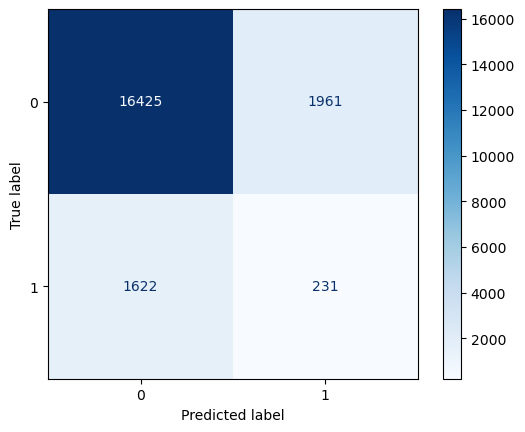

In [199]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [200]:
# Comments Random Forest C.:

# Metrics

# Accuracy: The model's overall correctness in predictions is at 82%, which is relatively high.

# Precision: In this case, the value of 10% is indicating a high number of false positives compared 
# to true positives.

# Recall: It's at 12.5%, suggesting that the model is identifying only a small portion of the actual positive cases.

# F1: F1 is 11%. This indicates that the model's balance between precision and recall is not very high.

# Confusion matrix:

# There's a substantial number of false negatives (predicted 0 but were actually 1), which impacts 
# both recall and precision.

# False positives (predicted 1 but were actually 0) are also present, affecting precision.

# True positives (predicted 1 and were actually 1) and true negatives (predicted 0 and were actually 0) 
# are relatively lower in number.

# Overall, the accuracy is high, but the low precision and recall indicate that the model 
# struggles with correctly identifying positive cases (1s in this scenario). 

In [201]:
# MLP Classifier

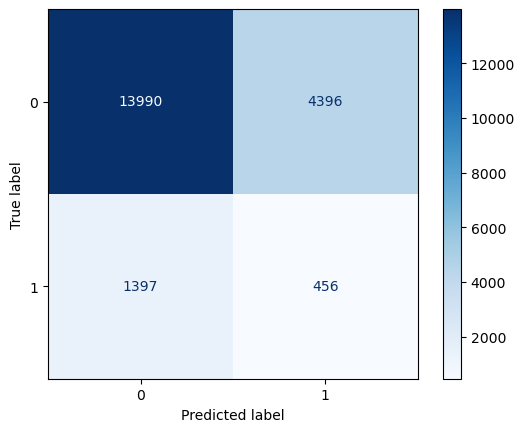

In [202]:
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [203]:
# Comments MLP C.:

# Accuracy: 71%
# Precision: 10.0%
# Recall: 24%
# F1: 14%

# MLP also shows limitations in terms of precision and recall for the positive class 
# (class 1, likely loan defaulters). However, the MLP Classifier performs better in recall but at the cost of a 
# lower accuracy compared to Random Forest.

# Given the context of banking, identifying potential loan defaulters is crucial, and missing out on such cases 
# (low recall) can be costly. In this scenario, higher recall, even with reduced accuracy, could be preferable as 
# it aims to capture more actual positive cases, although with more false positives.

# If the bank's primary concern is to identify potential loan defaulters, the MLP Classifier might be a better 
# choice due to its higher recall.

---------

In [204]:
# PCA - Principle Component Analysis - Feature Selection

In [205]:
# Let's see if PCA feature selection can improve the model

from sklearn.decomposition import PCA

pca = PCA(0.9)

pca.fit(X_train_smote)

X_train_pca = pca.transform(X_train_smote)
X_test_pca = pca.transform(X_test)

corr_pc = pd.DataFrame(X_train_pca).corr()

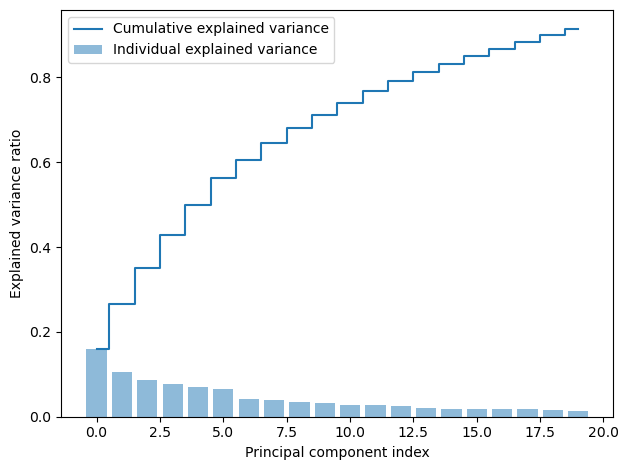

In [206]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


# visualization plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [207]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print (y_train.shape)
print(y_test.shape)

(85672, 20)
(20239, 20)
(47224,)
(20239,)


In [208]:
# From 36 features PCA has reduced to 20. Let's see the impact on the model.

----------

In [209]:
# Running the model on the SMOTE + PCA feature selection to see the differences

In [210]:
mlp2 = MLPClassifier()

mlp2.fit(X_train_pca, y_train_smote)

print('TrainSet = ',mlp2.score(X_train_pca, y_train_smote))
print('TestSet = ',mlp2.score(X_test_pca, y_test))

TrainSet =  0.7625945466430105
TestSet =  0.6756262661198675


In [211]:
pred_MLP = mlp2.predict(X_test_pca)

print('accuracy:', accuracy_score(y_test, pred_MLP))
print("precision: ",precision_score(y_test,pred_MLP))
print("recall: ",recall_score(y_test,pred_MLP))
print("f1: ",f1_score(y_test,pred_MLP))

accuracy: 0.6756262661198675
precision:  0.09224645205953617
recall:  0.2876416621694549
f1:  0.13969335604770017


In [212]:
# Let's look at the confusion matrix after dealing with imbalance + PCA feature selection

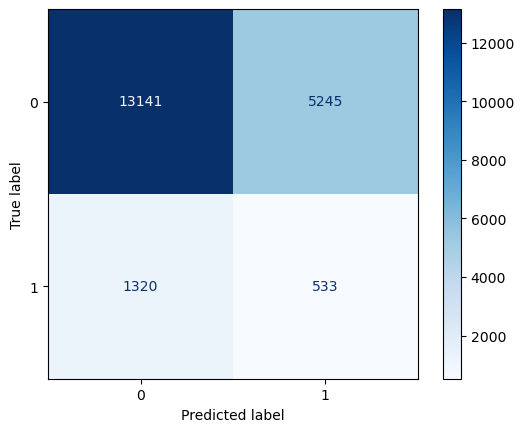

In [213]:
ConfusionMatrixDisplay.from_estimator(mlp2, X_test_pca, y_test, cmap=plt.cm.Blues)

plt.show()

In [214]:
# Comments:

# Before applying PCA feature selection, I tried with variance threshold and Kbest but since they had worse results,
# I used PCA to compare. 

# After applying PCA feature selection, we see:

# Accuracy: 67%
# Precision: 9%
# Recall: 28%
# F1: 14%

# While the recall has significantly increased, indicating a better ability to identify actual loan defaulters 
# among the positive cases, the precision remains quite low. This signifies that the model still classifies
# many non-defaulters as defaulters, leading to a substantial number of false positives.

# Since the general model works better without PCA and feature selection, we are going to continue the modelling
# without feature selection.

----------

In [215]:
# Hyperparameter Tuning

In [216]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

num_folds = 5

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 300]
}

kf = KFold(n_splits=num_folds, shuffle=True)

num_candidates = 10
num_fits_per_candidate = num_folds * num_candidates

param_grid_subset = {key: param_grid[key][:num_candidates // len(param_grid)] for key in param_grid}

modelgrid = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid_subset, refit=True, cv=kf, scoring='precision')
modelgrid.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(50,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_iter': [200],
                         'solver': ['adam']},
             scoring='precision')

In [217]:
best_params = modelgrid.best_params_
best_score = modelgrid.best_score_

results = modelgrid.cv_results_

In [218]:
results

{'mean_fit_time': array([62.45035329]),
 'std_fit_time': array([3.86838676]),
 'mean_score_time': array([0.03324633]),
 'std_score_time': array([0.00364288]),
 'param_activation': masked_array(data=['logistic'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.0001],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(50,)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=['constant'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate_init': masked_array(data=[0.001],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[200],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['adam'],
       

In [219]:
best_model = MLPClassifier(**best_params)

best_model.fit(X_train_smote, y_train_smote)

predictions = best_model.predict(X_test)

In [220]:
print('accuracy:', accuracy_score(y_test, predictions))
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))

accuracy: 0.6225109936261674
precision:  0.09840388619014573
recall:  0.3826227738801943
f1:  0.15654669905056304


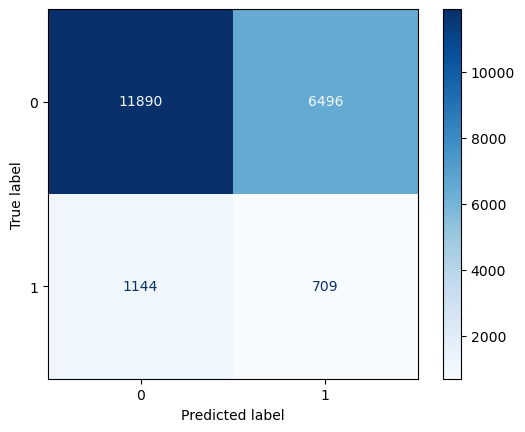

In [221]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [222]:
# Comments:

# Accuracy:

# The model with the best parameters has lower accuracy compared to the model without the best parameters. 

# Precision:

# Both models have low precision, indicating a high number of false positives 
# (incorrectly predicted positives out of all predicted positives). The model with the best parameters has 
# slightly higher precision.

# Recall:

# The model with the best parameters has a higher recall than the model without, indicating it captures a larger 
# proportion of actual positives. However, it's still moderate in both cases.

# F1:

# The model with the best parameters has a slightly higher F1, indicating a better balance between precision 
# and recall compared to the other model.

# In summary, the model with the best parameters shows improvements in recall and a slightly better F1
# but sacrifices accuracy.

-----------------

In [223]:
# Trying to improve the model and compare with neural network

In [229]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(X_train_smote.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = model.evaluate(X_test, y_test)[1]
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Epoch 1/10
1339/1339 [==============================] - 5s 3ms/step - loss: 0.6837 - accuracy: 0.5509 - val_loss: 0.6521 - val_accuracy: 0.5957
Epoch 2/10
1339/1339 [==============================] - 4s 3ms/step - loss: 0.6612 - accuracy: 0.6044 - val_loss: 0.6356 - val_accuracy: 0.6083
Epoch 3/10
1339/1339 [==============================] - 3s 2ms/step - loss: 0.6418 - accuracy: 0.6323 - val_loss: 0.6728 - val_accuracy: 0.5630
Epoch 4/10
1339/1339 [==============================] - 3s 3ms/step - loss: 0.6281 - accuracy: 0.6472 - val_loss: 0.6689 - val_accuracy: 0.5847
Epoch 5/10
1339/1339 [==============================] - 3s 3ms/step - loss: 0.6183 - accuracy: 0.6588 - val_loss: 0.6150 - val_accuracy: 0.6520
Epoch 6/10
1339/1339 [==============================] - 3s 2ms/step - loss: 0.6128 - accuracy: 0.6648 - val_loss: 0.6050 - val_accuracy: 0.6670
Epoch 7/10
1339/1339 [==============================] - 3s 2ms/step - loss: 0.6069 - accuracy: 0.6727 - val_loss: 0.5541 - val_accuracy:

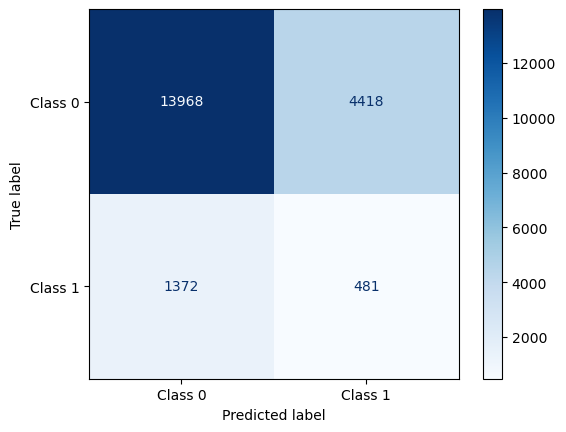

In [230]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.show()


In [231]:
# Comments on NN model

# Confusion Matrix:

# The neural network model shows higher numbers for true negatives and true positives compared to both the 
# MLP model with best parameters and the one without.

# Evaluation Metrics:

# Accuracy: The neural network model has the highest accuracy compared to the previous models.

# Precision: Similar to the model without best parameters, the precision of this model is quite low.

# Recall: The recall of this model is slightly higher compared to the model without best parameters but still
# relatively low.

# F1: The F1 is also low, indicating a trade-off between precision and recall.

-----------------------------

In [232]:
# Final Results:

# Given the context of a banking scenario where the cost of defaults is high, it's crucial to minimize 
# false negatives (predicting non-default when it's actually a default). This is because the cost of missing a 
# default (false negative) is normally significantly higher than the cost of predicting a false positive.

# Considering the models:

# Model 1 has the highest recall among the compared models. It correctly identifies more true positives (defaults) 
# but at the expense of more false positives.

# Model 2 and Model 3 perform similarly, with slightly lower recall but higher accuracy compared to Model 1.

# In this scenario, the neural network model with best parameters (Model 1) might be preferred due to its higher 
# recall.

# Ultimately, the choice between models would always depend on the specific trade-offs acceptable in the banking 
# context between correctly identifying defaults (minimizing false negatives) and tolerating a certain level of 
# false positives, considering the high cost of defaults.